<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Linear Regression Implementation</h1>
Copyright Machine Learning Plus
</div>

Linear Regression is one of the most basic machine learning algorithms that is used to predict a dependent variable based on one or more independent variables. The dependent variable (Y) should be continuous. Linear regression finds the mathematical equation that best describes the Y variable as a function of the X variables (features). Once the equation is formed, it can be used to predict the value of Y when only the X is known.

### Content : 
1. Convert Business Problem to Data Science Problem
2. Load Data
3. Data Overview
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Building
    - Forward Selection
    - Backward Selection
    - Stepwise Selection
7. Model Evaluation
8. Predictions and Evaluations

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

In this section you will:

- Import the libraries
- Set the options for better visulization

In [99]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import random
import scipy.optimize

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Load Data</h2>
</div>

In this section you will:

- Load the data

Read the data using pd.read_csv() function

In [100]:
# Load the csv file
df = pd.read_csv("./datasets/AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Data Overview</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

In [101]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [102]:
# Summary statistic of the data
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [103]:
# Get count of missing values in every column
print(df.isna().sum())

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The data contains some categorical columns, these columns needs to be encoded before building the model
- Lot of columns have missing values, these needs to be handled before building the model
- The y variable doesn't have any missing value, that's good

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Exploratory Data Analysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Remove spaces in column names
- Check the distribution of target variable
- Check the correlation between different features
- Check the realation between different features

In [104]:
# Create list of numeric and categorical columns and check if they have extra spaces in the column names
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')
Categorical columns: 
 Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Ext

Few columns have spaces in their column names. Let's remove those

In [105]:
df.columns = df.columns.str.replace(' ', '') # Replacing the white spaces in columns' names

In [106]:
# Create list of numeric and categorical columns and check if they have extra spaces in the column names
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Order', 'PID', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemod/Add', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical columns: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposur

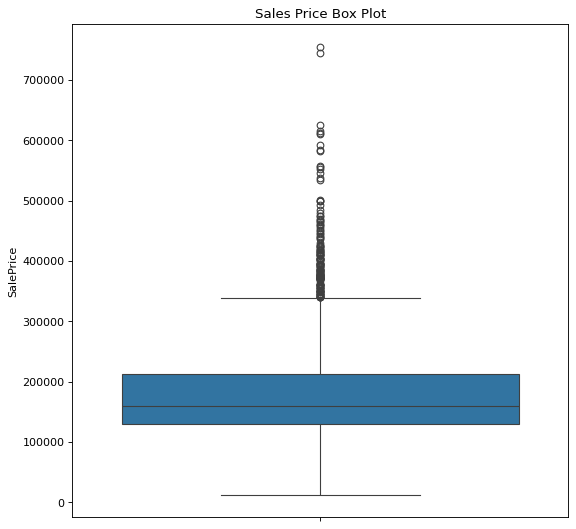

In [107]:
# Check the distribution of y variable (SalePrice) using box plot
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['SalePrice'])
plt.title('Sales Price Box Plot')
plt.show()

__Certain extreme values are present on the higher side__

In [108]:
# The extreme value records: high sales price.
df[df['SalePrice'] > 350000].head()

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
15,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
17,18,527258010,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
36,37,528108120,60,RL,102.0,12858,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,Stone,162.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1590.0,1590.0,GasA,Ex,Y,SBrkr,1627,707,0,2334,0.0,0.0,2,1,3,1,Ex,10,Typ,1,Gd,Attchd,2009.0,Fin,3.0,751.0,TA,TA,Y,144,133,0,0,0,0,NaN,NaN,NaN,0,1,2010,New,Partial,376162
38,39,528120060,20,RL,83.0,10159,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,450.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1646.0,Unf,0.0,284.0,1930.0,GasA,Ex,Y,SBrkr,1940,0,0,1940,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2010.0,Fin,3.0,606.0,TA,TA,Y,168,95,0,0,0,0,NaN,NaN,NaN,0,4,2010,New,Partial,395192
44,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


<Axes: title={'center': 'Sales Price Distribution Plot'}, xlabel='SalePrice', ylabel='Count'>

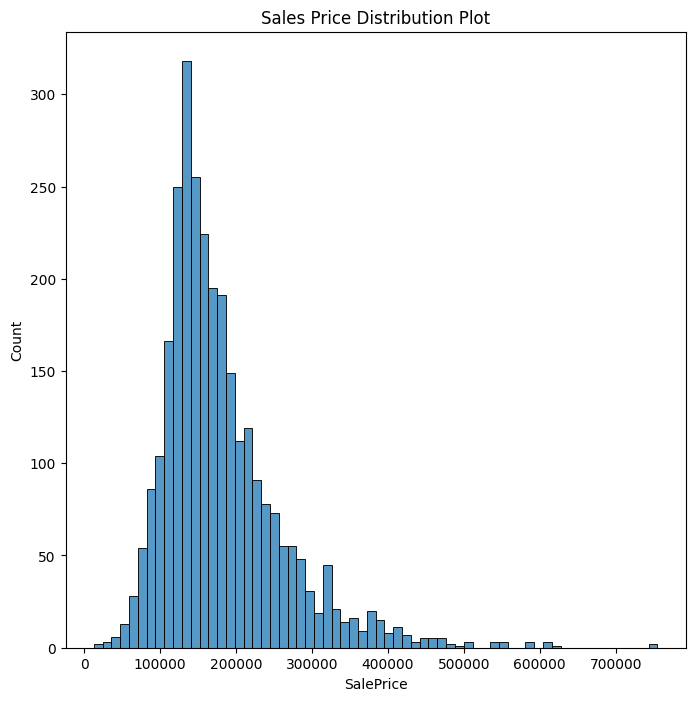

In [109]:
# Check the distribution of y variable (SalePrice) using dist plot
plt.figure(figsize=(8,8))
plt.title('Sales Price Distribution Plot')
sns.histplot(df['SalePrice'])

In [110]:
# Skew and kurt
print("Skewness: %f" % abs(df['SalePrice']).skew())
print("Kurtosis: %f" % abs(df['SalePrice']).kurt())

Skewness: 1.743500
Kurtosis: 5.118900


#### Summary : 

The y variable is having very few outliers and is almost gaussian distributed.

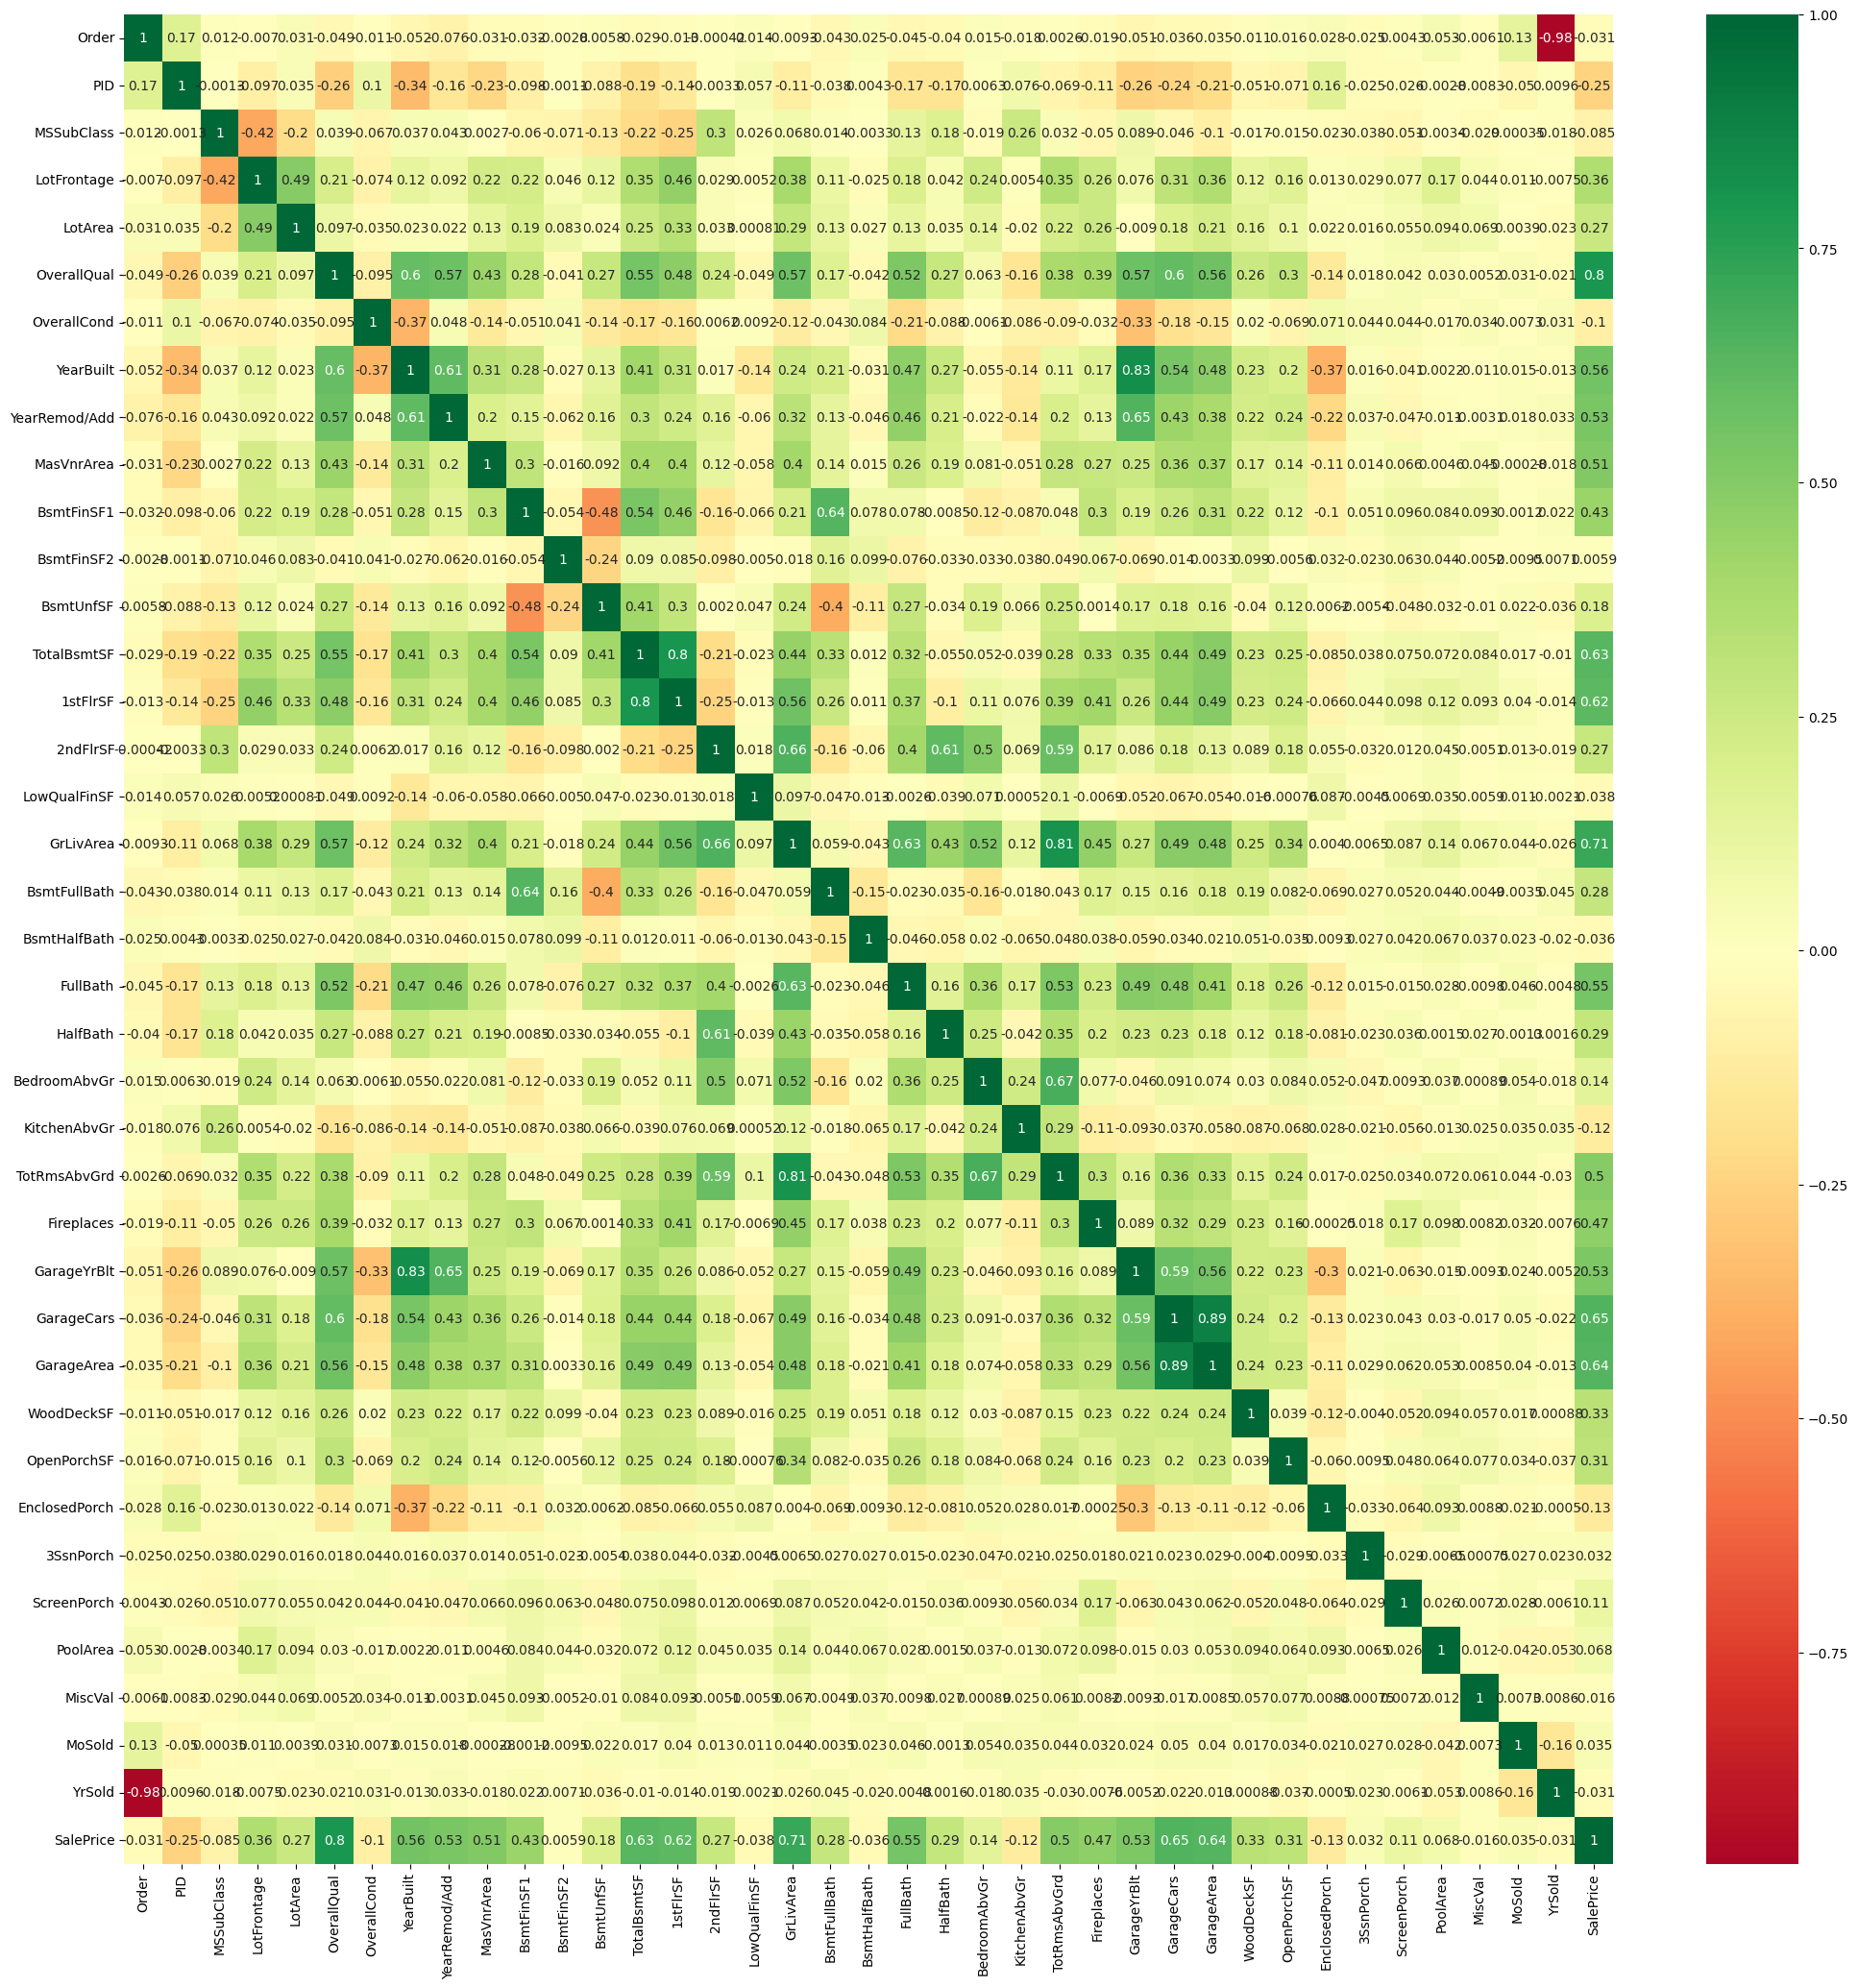

In [111]:
# Check the multicollinearity of features using the correlation matric
plt.figure(figsize=(25,25))
p = sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0)

It's a bit difficult to look at all the features at a time. Let's look at the correlation matric of top 10 highest correlated features.

In [112]:
a = {'a':1, 'b':2}
for key,value in a.items():
    print(key,value)

a 1
b 2


In [113]:
'a' in a.keys()

True

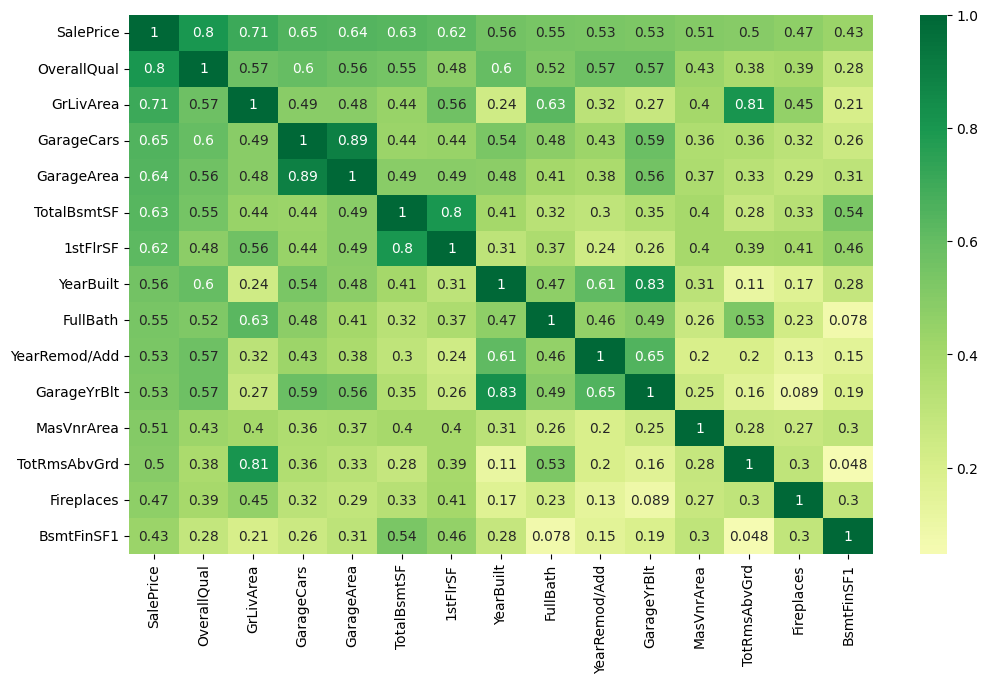

In [114]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = df[num_col].corr().nlargest(k, 'SalePrice')['SalePrice'].index
plt.figure(figsize=(12,7))
p = sns.heatmap(df[cols].corr(), annot=True,cmap='RdYlGn',center=0)

## Scatterplots

In [115]:
def scatterplot(x="OverallQual", y='SalePrice'):
    plt.figure(figsize=(10,7))
    plt.scatter(df[x], df[y], )
    plt.title(x + ' vs ' + y)
    plt.show()

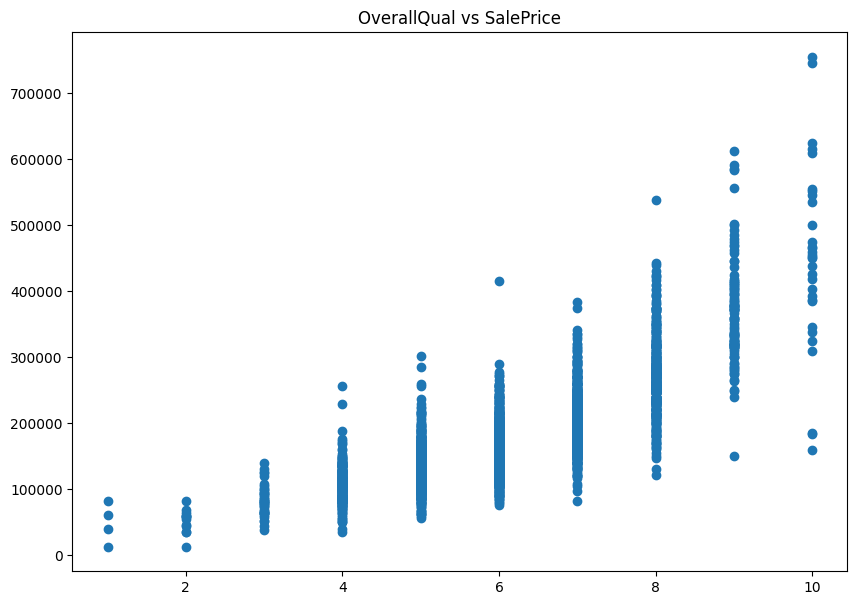

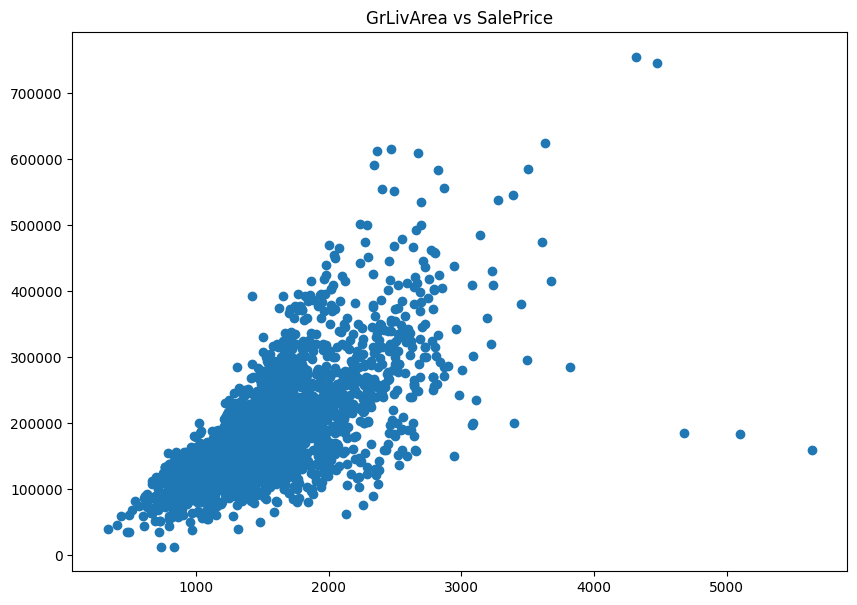

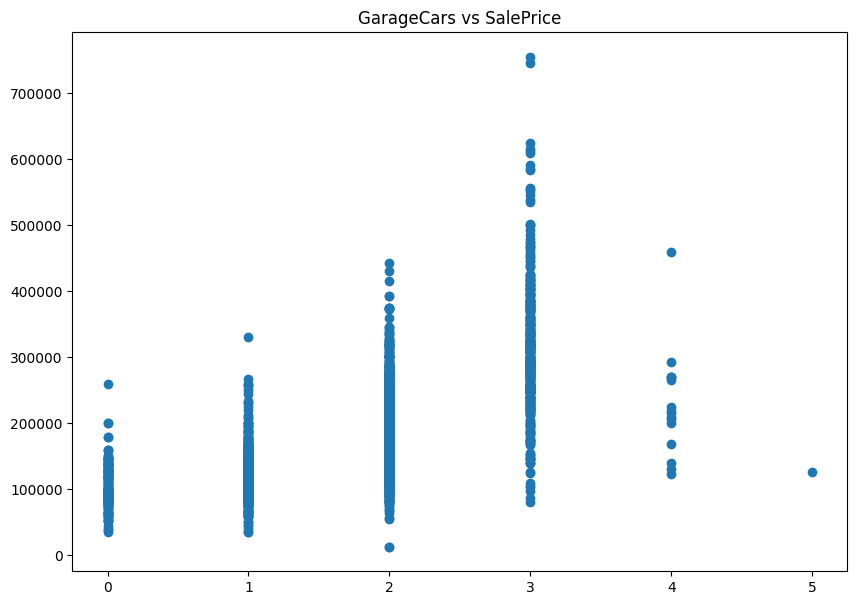

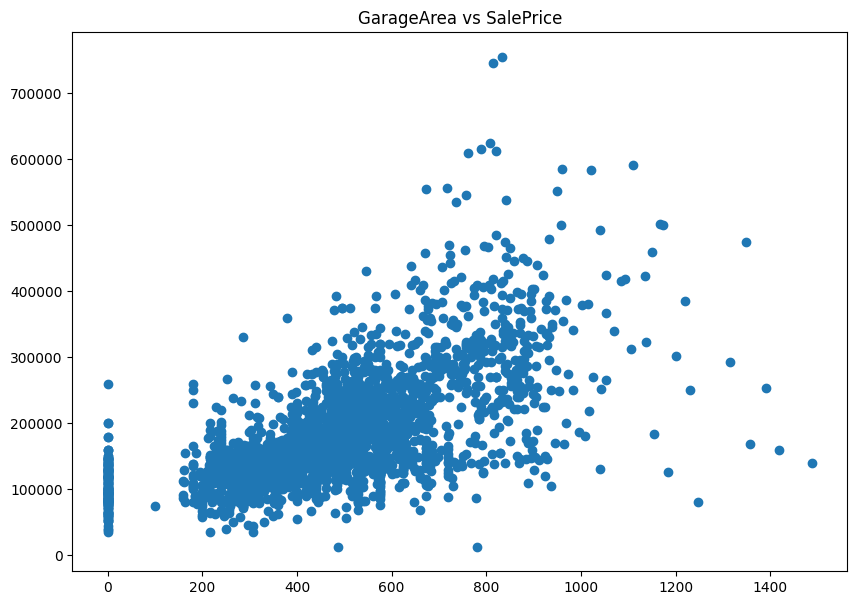

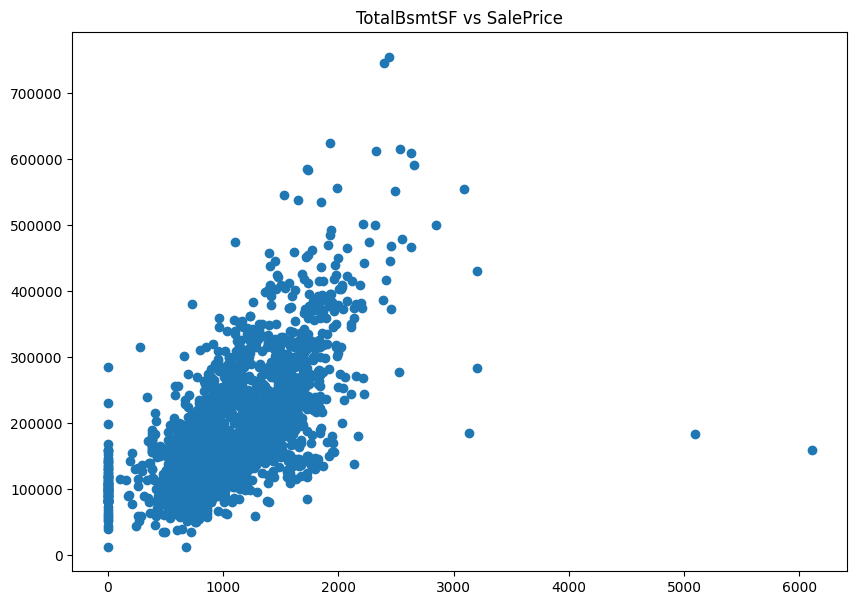

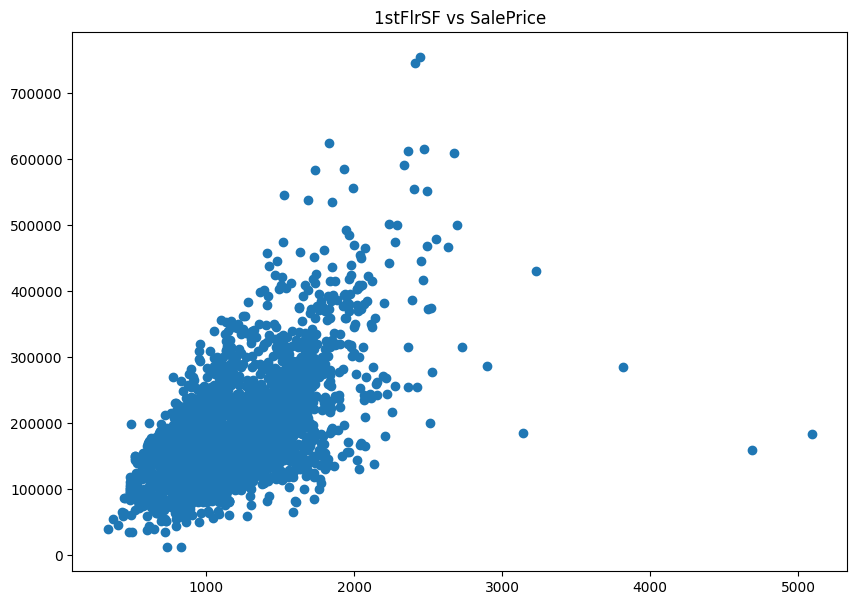

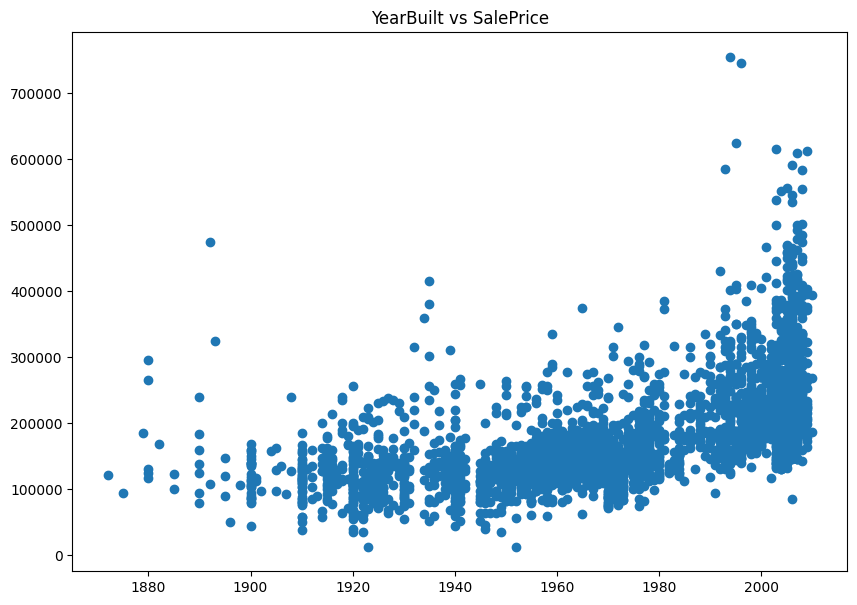

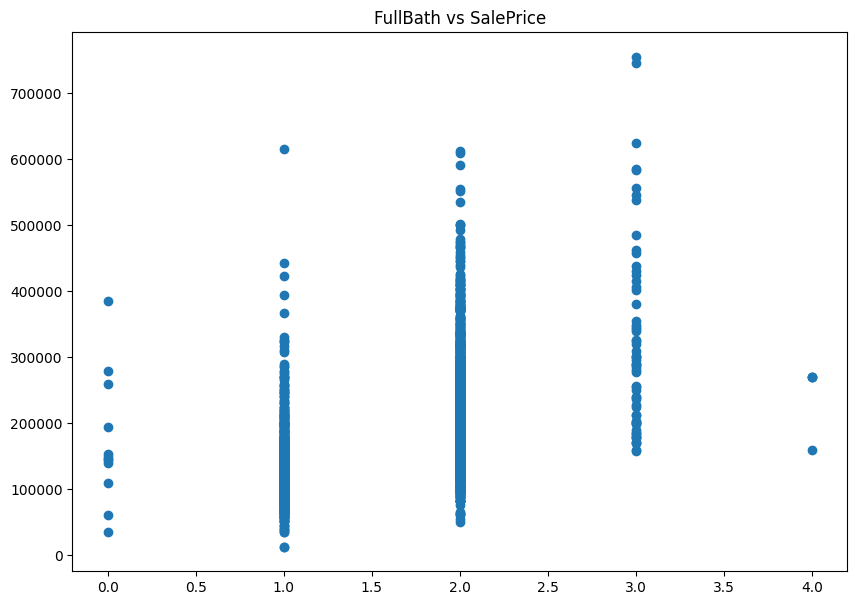

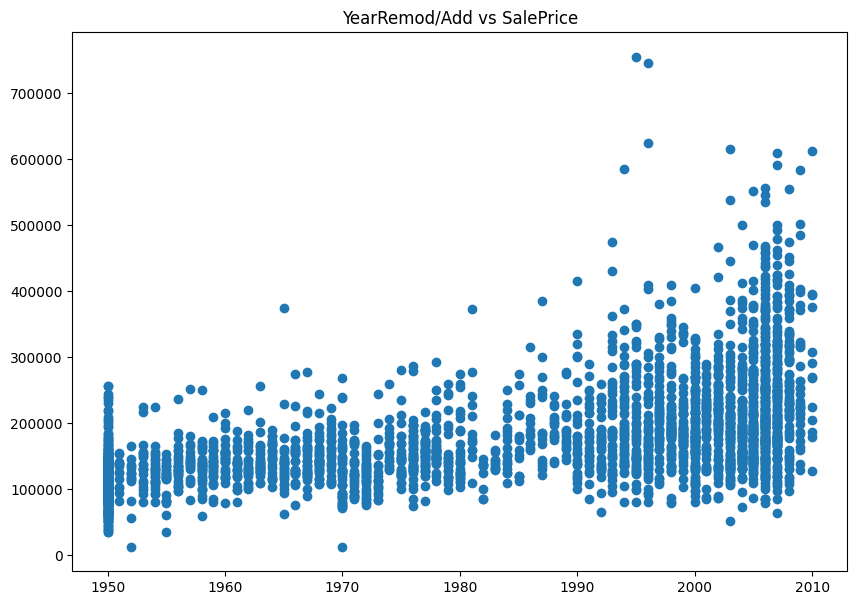

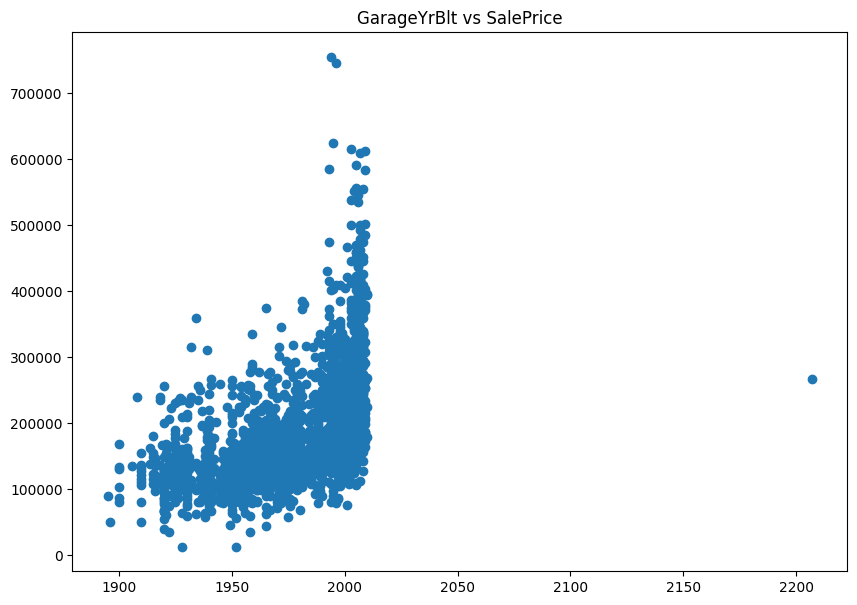

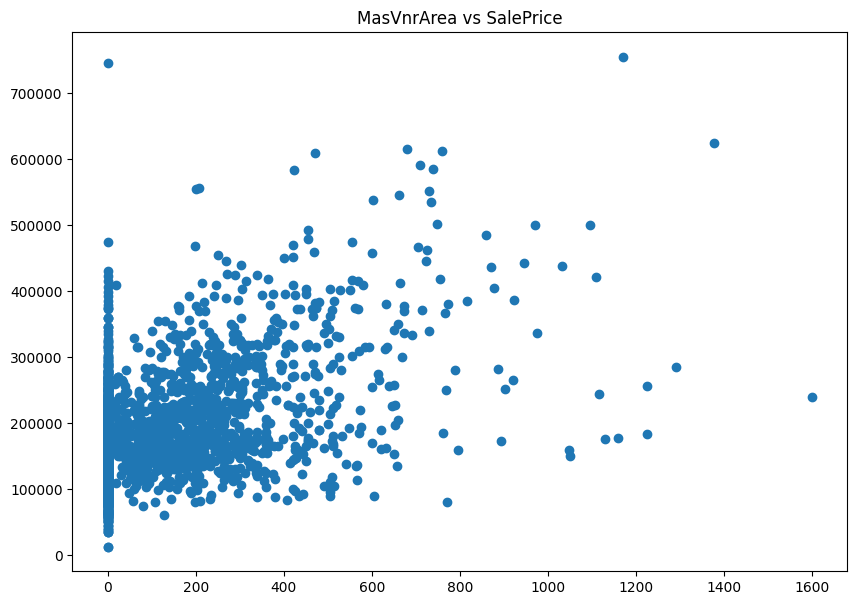

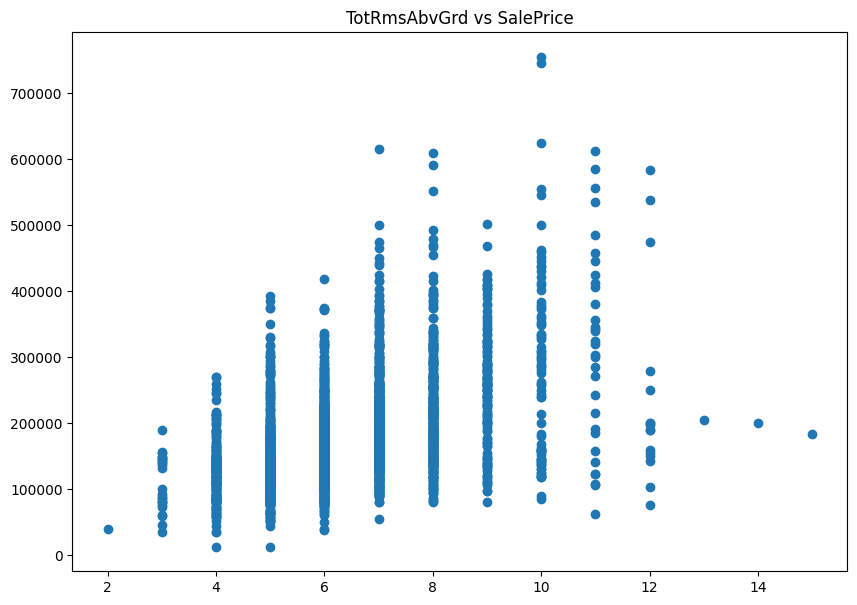

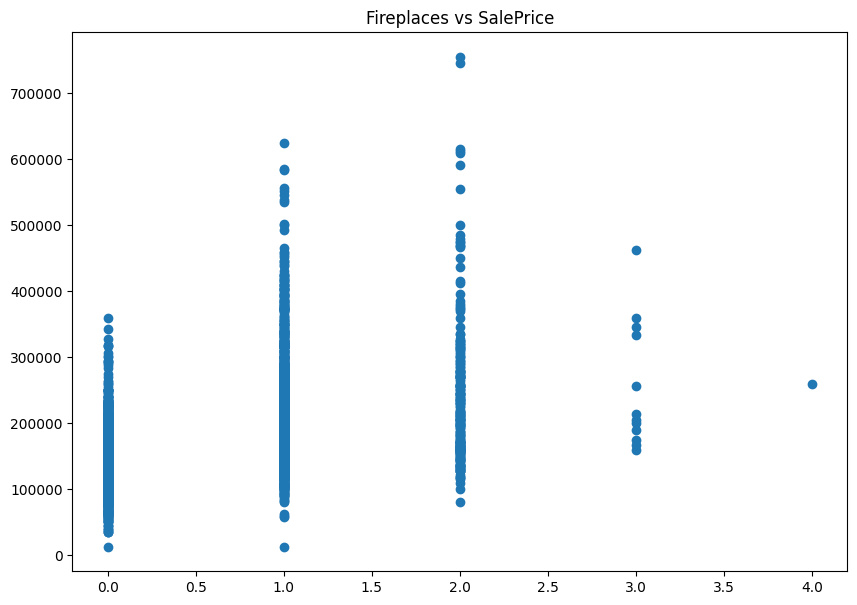

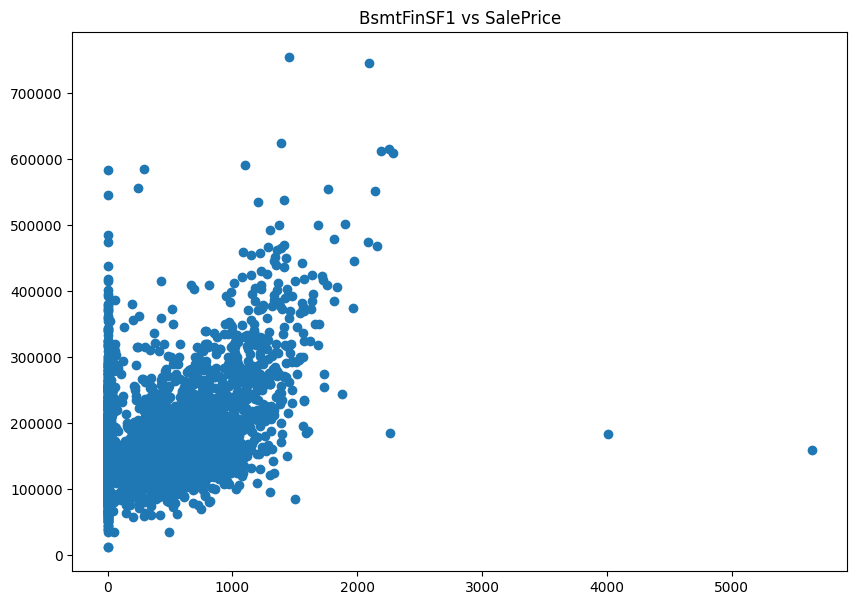

In [116]:
for col in cols[1:]:
    scatterplot(x=col, y='SalePrice')

Let's look at 10 highest negative correlated variables.

In [117]:
corr = df[num_col].corr()
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

MiscVal         -0.015691
YrSold          -0.030569
Order           -0.031408
BsmtHalfBath    -0.035835
LowQualFinSF    -0.037660
MSSubClass      -0.085092
OverallCond     -0.101697
KitchenAbvGr    -0.119814
EnclosedPorch   -0.128787
PID             -0.246521
Name: SalePrice, dtype: float64


The negative correlation is not too strong for all the 10 variables, let's consider only 4 variables with negative correlation greater than 0.1

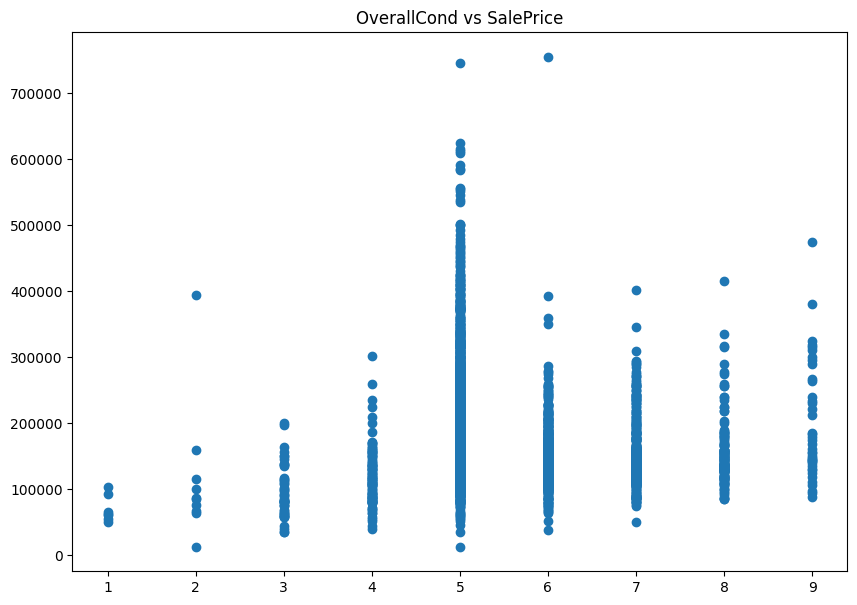

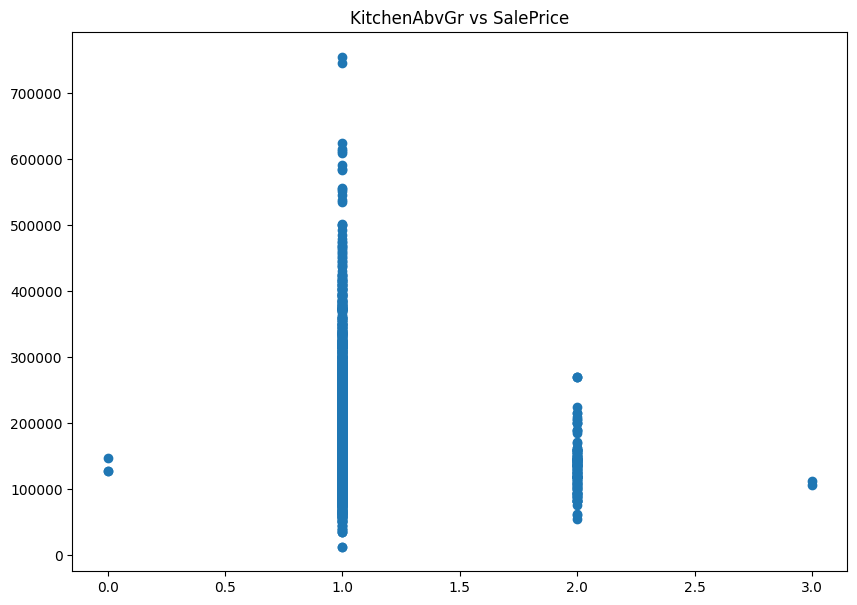

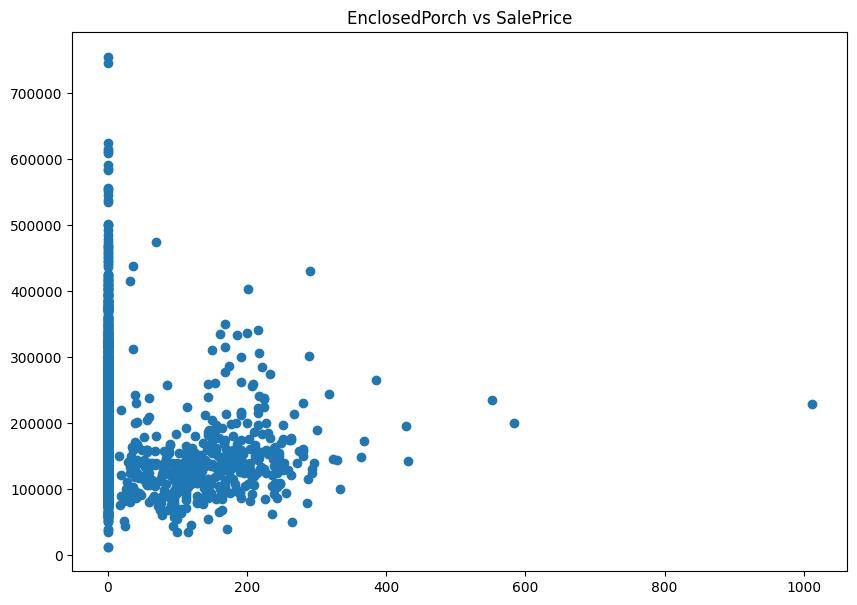

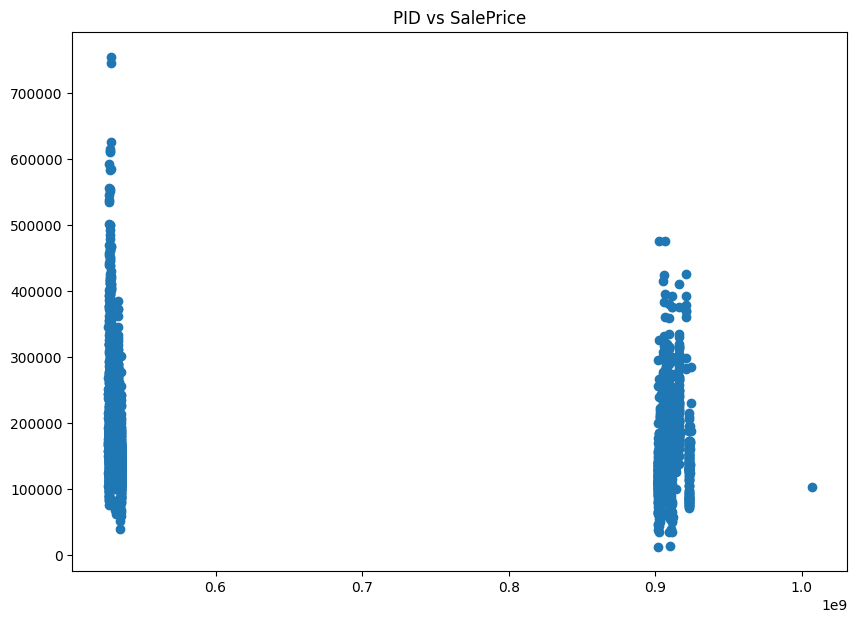

In [118]:
for col in corr['SalePrice'].sort_values(ascending=False)[-4:].index:
    scatterplot(x=col, y='SalePrice')

In [120]:
# Store 20 highest correlated variables for future reference
corr = df[num_col].corr()
print (corr['SalePrice'].sort_values(ascending=False)[1:21])
highest_correlated_cols = corr['SalePrice'].sort_values(ascending=False)[1:21].index

OverallQual      0.799262
GrLivArea        0.706780
GarageCars       0.647877
GarageArea       0.640401
TotalBsmtSF      0.632280
1stFlrSF         0.621676
YearBuilt        0.558426
FullBath         0.545604
YearRemod/Add    0.532974
GarageYrBlt      0.526965
MasVnrArea       0.508285
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
BsmtFinSF1       0.432914
LotFrontage      0.357318
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
BsmtFullBath     0.276050
2ndFlrSF         0.269373
Name: SalePrice, dtype: float64


Few of the features are having the linear relationship with y variable. So linear regression would be good approach for the same

In [ ]:
# Pair Plots to know the relation between different features
# ax = sns.pairplot(df[num_col])

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data by treating missing values
- Detect the outliers and remove those
- Encode the categorical features
- Split the dataset in X and y dataset
- Split the data in train and test set

### Missing Value Treatment
- Impute the missing values with help of domain knowledge and description file
- Drop the 2 columns with 5% and 16% missing values
- Impute the rows with missing values with mode

In [25]:
# Filling Categorical NaN (That we know how to fill due to the description file )

df['Functional'] = df['Functional'].fillna('Typ')
df['Electrical'] = df['Electrical'].fillna("SBrkr")
df['KitchenQual'] = df['KitchenQual'].fillna("TA")
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df["PoolQC"] = df["PoolQC"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df['FireplaceQu'] = df['FireplaceQu'].fillna("None")
df['Fence'] = df['Fence'].fillna("None")
df['MiscFeature'] = df['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [26]:
# Missing Value% within the data

nan = pd.DataFrame(df.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/df.shape[0])*100
nan = nan.sort_values(by = ['NaN_sum'], ascending = False)
nan.reset_index(drop = True, inplace = True)
nan

,NaN_sum,feat,Perc(%)
0,1775,MasVnrType,60.580205
1,490,LotFrontage,16.723549
2,159,GarageYrBlt,5.426621
3,23,MasVnrArea,0.784983
4,2,BsmtFullBath,0.068259
5,2,BsmtHalfBath,0.068259
6,1,TotalBsmtSF,0.034130
7,1,BsmtUnfSF,0.034130
8,1,BsmtFinSF2,0.034130
9,1,BsmtFinSF1,0.034130


In [27]:
# Drop features with 16 and 5% missing values
df = df.drop(columns=['LotFrontage'])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df = df.dropna()

### Outlier Treatment
1. Find out the bivariate outlier and remove those
2. Check the mahaloanobis distance of points
3. Find out the outliers in y variable and remove those 

In [28]:
df.head()

,Order,PID,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,31770,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,215000
2,3,526351010,20,RL,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
5,6,527105030,60,RL,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,195500
15,16,527216070,60,RL,53504,Pave,None,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,None,None,None,0,6,2010,WD,Normal,538000
17,18,527258010,20,RL,11394,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,None,None,None,0,6,2010,New,Partial,394432


#### 1. Bivariate Based

Let's look the Sales Price vs GrLivArea scatter plot to see if has any outliers.

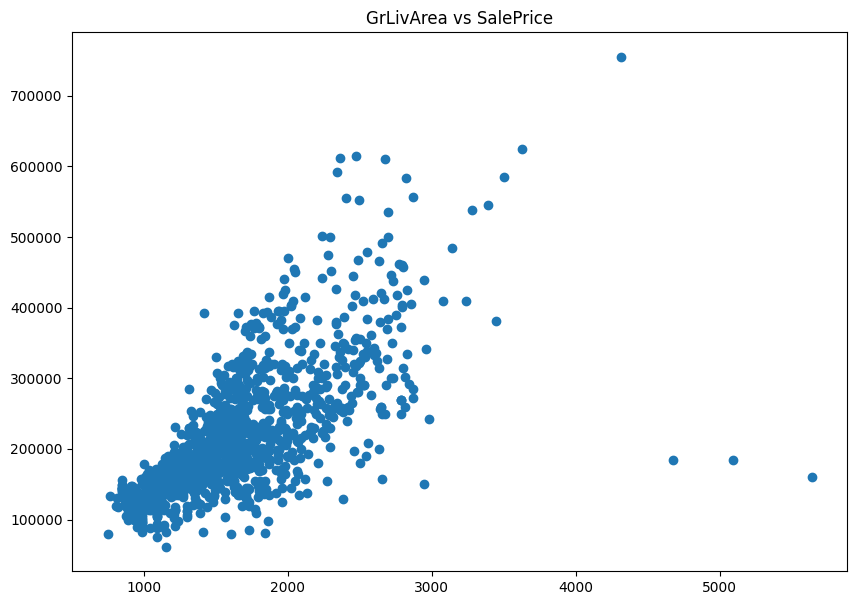

In [33]:
# Scatter Plot Sale Price vs GrLivArea
scatterplot(x="GrLivArea", y='SalePrice')

As you can see, there are 3 outliers points on the bottom right of the plot. There doesn't fit in the relationship. These are the outliers.

In [34]:
# Outlier Points
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]

,Order,PID,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1498,1499,908154235,60,RL,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,40094,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,None,None,None,0,10,2007,New,Partial,184750


In [35]:
# Drop Outliers
df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index, inplace = True)
df.reset_index(drop=True, inplace=True)

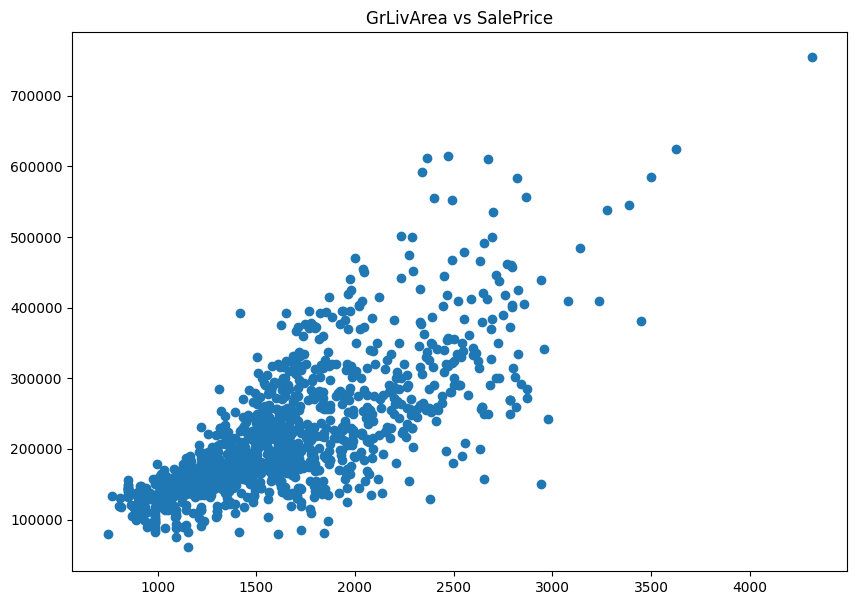

In [36]:
# Scatter Plot Sale Price vs GrLivArea
scatterplot(x="GrLivArea", y='SalePrice')

#### 2. Mahalanobis Distance

In [37]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['1stFlrSF', 'SalePrice']].head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['1stFlrSF', 'SalePrice']])
df_x.head()

,1stFlrSF,SalePrice,mahala
0,1656,215000,130373.530664
1,1329,172000,130882.396279
2,926,195500,131997.050891
3,1690,538000,132355.985233
4,1856,394432,131036.371430


In [38]:
df_xtreme = df_x.loc[df_x.mahala > (4*df_x.mahala.mean())]
print(df_xtreme.shape)
df_xtreme.sort_values('mahala', ascending=False).head(10)

(0, 3)


,1stFlrSF,SalePrice,mahala


If you compare the above observations against rest of the dataset, they are clearly extreme. Let's plot some values

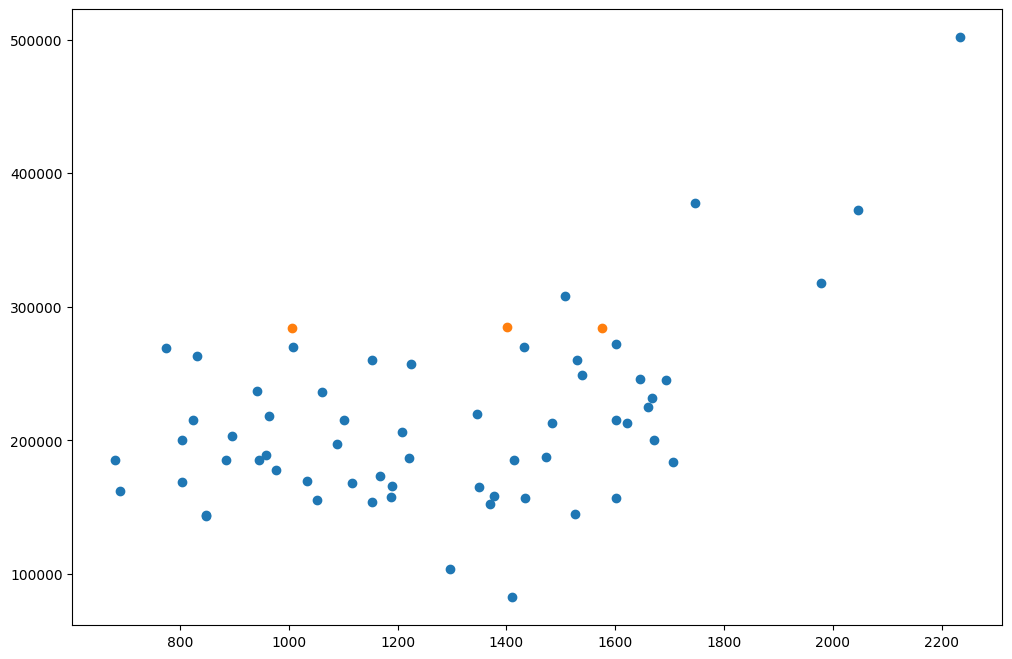

In [39]:
plt.figure(figsize = (12,8))
plt.scatter(df_x['1stFlrSF'][90:150], df_x['SalePrice'][90:150])
plt.scatter(df_x['1stFlrSF'].take([431,432,44]), df_x['SalePrice'].take([432,431,44]))
plt.show()

These points are very far from the distribution. You can remove these points as well. 

But, we are not going to remove now, because, the mahalanobis distance is calculated with all (or only one of) the features, some of which might be meaningless/not useful to predict saleprice. Better do it keeping all important features, and only if it helps to improve your Linear Reg model.

In [ ]:
# Drop Outliers  [NOT RUN]
# df.drop(df_xtreme.index, inplace = False).head(20)
# df.reset_index(drop=True, inplace=True)

#### 3. Outlier Detection using Z score

Compute Z-scores of sale price to find outliers.

In [40]:
df['zscore_SalePrice'] = (df.SalePrice  - df.SalePrice.mean() ) / df.SalePrice.std()
df.head()

,Order,PID,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,zscore_SalePrice
0,1,526301100,20,RL,31770,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,215000,-0.054321
1,3,526351010,20,RL,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,172000,-0.521850
2,6,527105030,60,RL,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,195500,-0.266340
3,16,527216070,60,RL,53504,Pave,None,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,None,None,None,0,6,2010,WD,Normal,538000,3.457585
4,18,527258010,20,RL,11394,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445.0,Unf,0.0,411.0,1856.0,GasA,Ex,Y,SBrkr,1856,0,0,1856,1.0,0.0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3.0,834.0,TA,TA,Y,113,0,0,0,0,0,None,None,None,0,6,2010,New,Partial,394432,1.896603


In [41]:
# Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away
df[(df.zscore_SalePrice<-3) | (df.zscore_SalePrice>3)]

,Order,PID,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,zscore_SalePrice
3,16,527216070,60,RL,53504,Pave,None,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,0,None,None,None,0,6,2010,WD,Normal,538000,3.457585
20,45,528150070,20,RL,12919,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,None,None,None,0,3,2010,New,Partial,611657,4.258441
22,47,528176010,20,RL,14300,Pave,None,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373.0,Unf,0.0,1473.0,2846.0,GasA,Ex,Y,SBrkr,2696,0,0,2696,1.0,0.0,2,1,3,1,Ex,10,Typ,2,Gd,Attchd,2003.0,Fin,3.0,958.0,TA,TA,Y,220,150,0,0,0,0,None,None,None,0,6,2010,WD,Normal,500000,3.044420
130,367,527214050,20,RL,17423,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904.0,Unf,0.0,312.0,2216.0,GasA,Ex,Y,SBrkr,2234,0,0,2234,1.0,0.0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3.0,1166.0,TA,TA,Y,0,60,0,0,0,0,None,None,None,0,7,2009,New,Partial,501837,3.064393
162,424,528106020,20,RL,15431,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,SBrkr,2402,0,0,2402,1.0,0.0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3.0,672.0,TA,TA,Y,0,72,0,0,170,0,None,None,None,0,4,2009,WD,Normal,555000,3.642422
170,433,528110020,20,RL,13693,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,Ex,Y,SBrkr,2674,0,0,2674,2.0,0.0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2007.0,Fin,3.0,762.0,TA,TA,Y,360,50,0,0,0,0,None,None,None,0,3,2009,WD,Normal,610000,4.240425
171,434,528110090,60,RL,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1734.0,1734.0,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0.0,0.0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3.0,1020.0,TA,TA,Y,52,170,0,0,192,0,None,None,None,0,1,2009,New,Partial,582933,3.946132
193,457,528176030,20,RL,14836,Pave,None,IR1,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,730.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2146.0,Unf,0.0,346.0,2492.0,GasA,Ex,Y,SBrkr,2492,0,0,2492,1.0,0.0,2,1,2,1,Ex,8,Typ,1,Ex,Attchd,2004.0,Fin,3.0,949.0,TA,TA,Y,226,235,0,0,0,0,None,None,None,0,2,2009,WD,Abnorml,552000,3.609804
429,1064,528164060,20,RL,12720,Pave,None,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0

In [42]:
# Drop Outliers
df.drop(df[(df.zscore_SalePrice<-3) | (df.zscore_SalePrice>3)].index, inplace = True)
df.reset_index(drop=True, inplace=True)

In [43]:
df.shape

(1135, 82)

### Feature Encoding

In [44]:
df_encoded = pd.get_dummies(df)
df_encoded

,Order,PID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,zscore_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_C

In [ ]:
df_encoded.to_csv('hoursing_df_cleaned.csv', index = False)

In [77]:
# Split the dataset in X and y
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded[['SalePrice']]

In [79]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X_train.head()

,Order,PID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,zscore_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleTyp

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Building Linear Regression</h2>
</div>

In [47]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf  # formula api

__Scikit Learn API__

In [48]:
Lmod = LinearRegression()
Lmod.fit(X=df.loc[:, ['GrLivArea']], y=df['SalePrice'])
print("Coefs: ", Lmod.coef_)
print("Intercept: ", Lmod.intercept_)

Coefs:  [122.51878876]
Intercept:  14122.477004501183


__Statsmodels Formula API__

In [49]:
mod = smf.ols(formula='SalePrice ~ GrLivArea', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1178.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          1.43e-177
Time:                        15:37:45   Log-Likelihood:                -14039.
No. Observations:                1135   AIC:                         2.808e+04
Df Residuals:                    1133   BIC:                         2.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.412e+04   6084.030      2.321      0.0

- F Statistic [Reference](http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm)
- F Test [Interpretation](https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/)

__Statsmodels Standard API__

In [50]:
# Add a constant
X_data = sm.add_constant(df[['GrLivArea', 'TotalBsmtSF', 'GarageCars']])
Y_data = df['SalePrice']
X_data.head()

,const,GrLivArea,TotalBsmtSF,GarageCars
0,1.0,1656,1080.0,2.0
1,1.0,1329,1329.0,1.0
2,1.0,1604,926.0,2.0
3,1.0,1856,1856.0,3.0
4,1.0,2073,1542.0,2.0


In [51]:
# Create a first ols model
mod_s = sm.OLS(Y_data, X_data).fit()
print(mod_s.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1017.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          1.62e-320
Time:                        15:45:26   Log-Likelihood:                -13701.
No. Observations:                1135   AIC:                         2.741e+04
Df Residuals:                    1131   BIC:                         2.743e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.335e+04   5209.812    -12.161      

__Extract Params__

In [52]:
mod_s.params

const         -63354.196052
GrLivArea         74.797586
TotalBsmtSF       67.528736
GarageCars     34933.905998
dtype: float64

In [53]:
mod_s.fittedvalues

0       203309.452559
1       160731.391149
2       189020.552813
3       305605.174547
4       265698.321704
            ...      
1130    265681.536831
1131    179582.422823
1132    190051.034159
1133    147856.150802
1134    258301.314301
Length: 1135, dtype: float64

In [54]:
mod_s.rsquared

np.float64(0.7295452743182858)

In [55]:
mod_s.rsquared_adj

np.float64(0.728827887778016)

__Cooks Distance for Influential Data Points__

In [56]:
# Cooks Distance
np.set_printoptions(suppress=True)

# create instance of influence
influence = mod_s.get_influence()

# obtain Cook's distance for each observation
cooks = influence.cooks_distance

# display Cook's distances
print(cooks)

(array([0.00001928, 0.00007567, 0.00000811, ..., 0.00024668, 0.00002949,
       0.00272224]), array([1.        , 0.99999999, 1.        , ..., 0.99999988, 1.        ,
       0.99998521]))


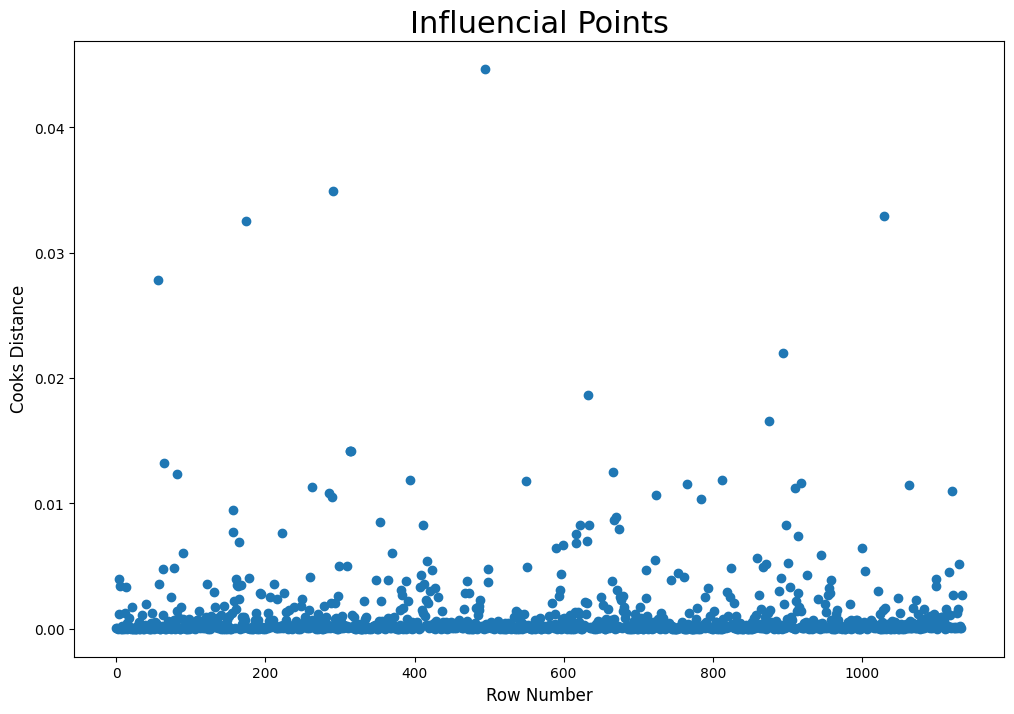

In [57]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(X.index, cooks[0])
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

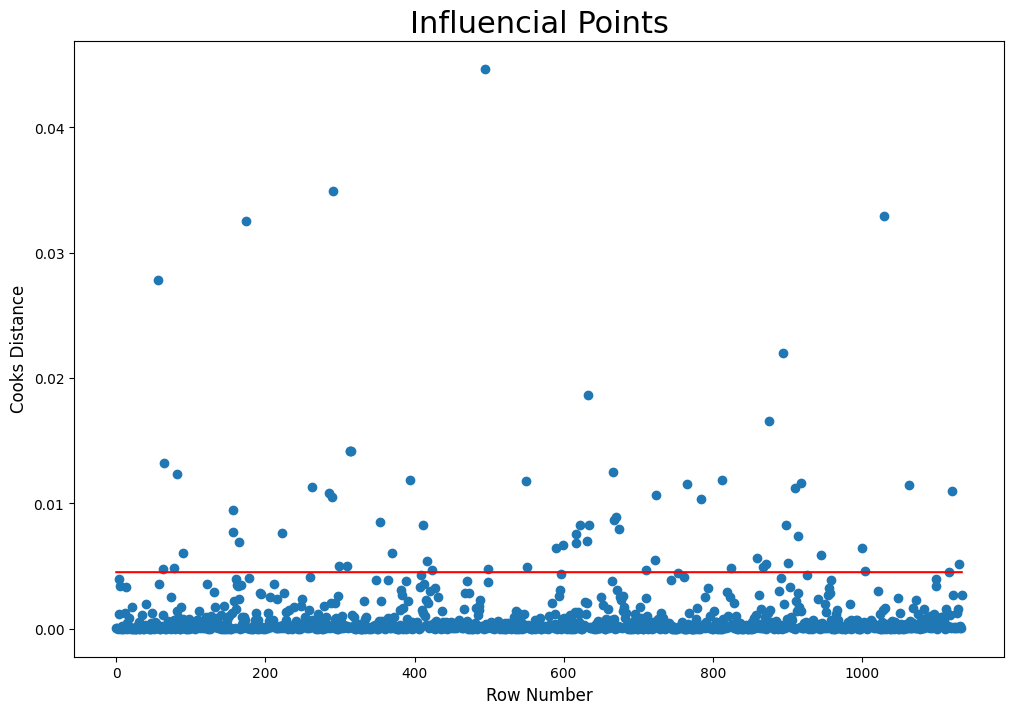

In [60]:
# Influentials are those that are at least 4 times the mean CD.
mean_cooks = np.nanmean(cooks[0])
mean_cooks_list = [4*mean_cooks for i in X.index]

# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(X.index, cooks[0])
plt.plot(X.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [61]:
# Influencial points
influencial_points = X.index[cooks[0] > 4*mean_cooks]
influencial_points

df.iloc[influencial_points, :]

,Order,PID,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,zscore_SalePrice
56,126,534427010,90,RL,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,TA,TA,CBlock,TA,TA,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,TA,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,TA,10,Typ,0,None,None,1978.132443,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,1,2010,Oth,Abnorml,84900,-1.468868
63,136,535106190,90,RL,11600,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,Duplex,2Story,5,5,1960,1960,Gable,CompShg,MetalSd,MetalSd,BrkFace,361.0,TA,TA,CBlock,TA,TA,No,Rec,443.0,Unf,0.0,662.0,1105.0,GasA,TA,Y,FuseA,1105,1169,0,2274,0.0,0.0,2,0,5,2,TA,12,Typ,0,None,Detchd,1960.000000,Unf,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,1,2010,WD,Normal,154300,-0.714298
64,137,535125010,20,RL,19900,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,7,5,1970,1989,Gable,CompShg,Plywood,Plywood,BrkFace,287.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,912.0,Unf,0.0,1035.0,1947.0,GasA,TA,Y,SBrkr,2207,0,0,2207,1.0,0.0,2,0,3,1,TA,7,Min1,1,Gd,Attchd,1970.000000,RFn,2.0,576.0,TA,TA,Y,301,0,0,0,0,0,None,None,None,0,7,2010,WD,Normal,180000,-0.434868
77,170,902102100,50,RM,4800,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1900,1954,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,771.0,TA,TA,PConc,TA,TA,No,ALQ,48.0,Unf,0.0,661.0,709.0,GasA,TA,Y,SBrkr,1157,687,0,1844,1.0,0.0,1,0,3,1,TA,9,Min2,2,Gd,Basment,1900.000000,Unf,1.0,240.0,TA,TA,Y,84,0,0,0,0,0,None,None,None,0,1,2010,COD,Abnorml,80400,-1.517796
81,217,905101300,90,RL,10773,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,3,1967,1967,Gable,Tar&Grv,Plywood,Plywood,BrkFace,72.0,Fa,Fa,CBlock,TA,TA,No,ALQ,704.0,Unf,0.0,1128.0,1832.0,GasA,TA,N,SBrkr,1832,0,0,1832,2.0,0.0,2,0,4,2,TA,8,Typ,0,None,None,1978.132443,None,0.0,0.0,None,None,Y,0,58,0,0,0,0,None,None,None,0,5,2010,WD,Normal,136000,-0.913270
90,247,906204230,60,RL,12361,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,7,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,85.0,Gd,Gd,PConc,Gd,TA,No,GLQ,860.0,Unf,0.0,86.0,946.0,GasA,Ex,Y,SBrkr,964,838,0,1802,0.0,1.0,2,1,3,1,Gd,8,Typ,1,Gd,2Types,2000.000000,RFn,4.0,1017.0,TA,TA,Y,450,92,0,0,0,0,None,None,None,0,5,2010,WD,Normal,218000,-0.021702
156,422,528102140,60,RL,14257,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,Norm,1Fam,2Story,9,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,726.0,Ex,TA,PConc,Ex,TA,No,GLQ,1360.0,Unf,0.0,416.0,1776.0,GasA,Ex,Y,SBrkr,1794,978,0,2772,1.0,0.0,3,1,4,1,Ex,10,Typ,3,Gd,BuiltIn,2007.000000,Fin,3.0,754.0,TA,TA,Y,135,64,0,0,0,0,None,None,None,0,6,2009,WD,Normal,462000,2.631255
157,423,528104070,60,RL,13518,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1926.0,1926.0,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0.0,0.0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.000000,Fin,3.0,820.0,TA,TA,Y,144,78,0,0,0,0,None,None,None,0,7,2009,New,Partial,485000,2.881328
164,432,528110010,60,RL,13478,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Sto

__Remove extreme influential points and rebuild__

In [62]:
# Remove Influencial points: Likely to be outiers, harder to predict accurately.
influencial_points = X.index[cooks[0] > 8*mean_cooks]
infuential_mask = df['Order'].isin(df.iloc[influencial_points, :]['Order'].values)
print("Removing these many top influential observations: ", infuential_mask.sum())
df_ = df.loc[infuential_mask, :]

Removing these many top influential observations:  28


In [63]:
# Create a first ols model
mod_s = sm.OLS(Y_data[~infuential_mask], X_data.loc[~infuential_mask, :]).fit()
print(mod_s.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1249.
Date:                Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:48:13   Log-Likelihood:                -13242.
No. Observations:                1107   AIC:                         2.649e+04
Df Residuals:                    1103   BIC:                         2.651e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.926e+04   4781.885    -14.483      

__Inference:__ Adj R-Squared has improved 4 points.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Evaluating Linear Regression</h2>
</div>

__Evaluating with Train Test Split__

In [64]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,Order,PID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,zscore_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_C

In [65]:
# Split the dataset in X and y
X_ = df_encoded.drop(columns=['SalePrice'])
y = df_encoded[['SalePrice']]

X = sm.add_constant(X_[['GrLivArea', 'TotalBsmtSF', 'GarageCars']])
y = df['SalePrice']

In [66]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
X_train.head()

,const,GrLivArea,TotalBsmtSF,GarageCars
395,1.0,1523,1193.0,2.0
328,1.0,1660,831.0,2.0
544,1.0,1094,1094.0,2.0
609,1.0,1495,1495.0,2.0
750,1.0,1573,756.0,2.0


In [67]:
# Create ols model on train data
mod_t = sm.OLS(y_train, X_train).fit()
print(mod_t.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     671.3
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          9.50e-217
Time:                        15:49:39   Log-Likelihood:                -9591.6
No. Observations:                 794   AIC:                         1.919e+04
Df Residuals:                     790   BIC:                         1.921e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.321e+04   6367.470     -9.927      

__Evaluation Metrics__

In [68]:
# predict on test data
y_pred = mod_t.predict(X_test)
y_pred_train = mod_t.predict(X_train)

In [70]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [73]:
# Eval metrics: Test, Train
print("MSE     : ", mean_squared_error(y_test,  y_pred).round(2), ", ", mean_squared_error(y_train,  y_pred_train).round(2))
print("MAPE    : ", mean_absolute_percentage_error(y_test,  y_pred).round(2), ", ", mean_absolute_percentage_error(y_train,  y_pred_train).round(2))
print("R2      : ", r2_score(y_test,  y_pred), ", ", r2_score(y_train,  y_pred_train))
print("MAE     : ", mean_absolute_error(y_test,  y_pred).round(2), ", ", mean_absolute_error(y_train,  y_pred_train).round(2))
print("ExpVar  : ", explained_variance_score(y_test,  y_pred), ", ", explained_variance_score(y_train,  y_pred_train))  # same as R-sq

MSE     :  1728296853.67 ,  1820524651.08
MAPE    :  0.15 ,  0.16
R2      :  0.7521901942570256 ,  0.7182468591536938
MAE     :  30359.71 ,  31213.8
ExpVar  :  0.7537816944288263 ,  0.7182468591536938


__Checking Model Assumptions__

[Assumptions of OLS Regression: Reference](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)

In [ ]:
mod = smf.ols(formula='SalePrice ~ GrLivArea + TotalBsmtSF + GarageCars', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2415.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:31:53   Log-Likelihood:                -34079.
No. Observations:                2858   AIC:                         6.817e+04
Df Residuals:                    2854   BIC:                         6.819e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.767e+04   2519.648    -10.983      

- Condition Number: Meant to be a measure to detect multicollinearity. Ratio of largest to smallest eigenvalue of exog vars. Gives warning if it exceeds value of 30, too low. Known to be [sensitive to scaling](https://github.com/statsmodels/statsmodels/issues/2378). Better use VIF based method instead. [Ref](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.condition_number.html),  [Mailing list discussion](https://groups.google.com/g/pystatsmodels/c/2werOyWj-5g/m/b7jKpCN9y3kJ?pli=1), [R based discussion](https://stackoverflow.com/questions/3042117/screening-multicollinearity-in-a-regression-model?rq=1)
- Omnibus Normtest [Ref](https://www.geeksforgeeks.org/statsmodels-omni_normtest-in-python/)

In [ ]:
# Mean of the residuals
res.resid.mean()

-2.562522007044251e-10

__Check VIF__

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

design_mat = df[['GrLivArea', 'TotalBsmtSF', 'GarageCars']]

vif = pd.DataFrame()
vif['Features'] = design_mat.columns
vif['VIF'] = [variance_inflation_factor(design_mat, i) for i in range(design_mat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GrLivArea,10.29
2,GarageCars,8.88
1,TotalBsmtSF,8.49


__Rebuild the model__

In [ ]:
# Remove GrLivArea
mod = smf.ols(formula='SalePrice ~ TotalBsmtSF + GarageCars', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1958.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:31:54   Log-Likelihood:                -34651.
No. Observations:                2858   AIC:                         6.931e+04
Df Residuals:                    2855   BIC:                         6.933e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.451e+04   2565.213      9.553      

In [ ]:
# VIF
design_mat = df[['TotalBsmtSF', 'GarageCars']]

vif = pd.DataFrame()
vif['Features'] = design_mat.columns
vif['VIF'] = [variance_inflation_factor(design_mat, i) for i in range(design_mat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalBsmtSF,6.26
1,GarageCars,6.26


__Check for Heteroscedasticity__

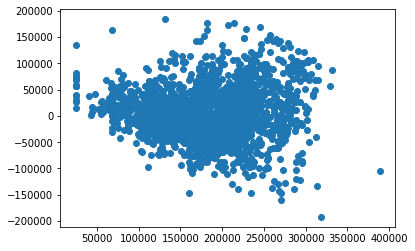

In [ ]:
# Fitted vs Residuals
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(res.fittedvalues, res.resid);

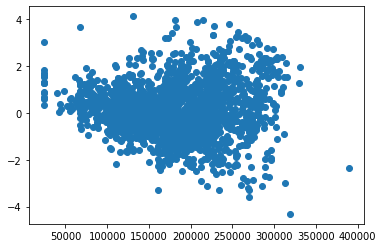

In [ ]:
# Standardized residuals
fig, ax = plt.subplots(figsize=(6,4))
resid_standardized = (res.resid-res.resid.mean())/res.resid.std()
ax.scatter(res.fittedvalues, resid_standardized);

__Overcoming Heteroscedasticity__

- Do some transformations on the variables: Log, sqrt, [Box Cox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html), etc
- Rebuild the model with new variables.

In [ ]:
mod = smf.ols(formula='np.log(SalePrice) ~ TotalBsmtSF + GarageCars', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1948.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:31:55   Log-Likelihood:                -107.00
No. Observations:                2858   AIC:                             220.0
Df Residuals:                    2855   BIC:                             237.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.1554      0.014    771.911      

In [ ]:
# VIF
design_mat = df[['TotalBsmtSF', 'GarageCars']]

vif = pd.DataFrame()
vif['Features'] = design_mat.columns
vif['VIF'] = [variance_inflation_factor(design_mat, i) for i in range(design_mat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalBsmtSF,6.26
1,GarageCars,6.26


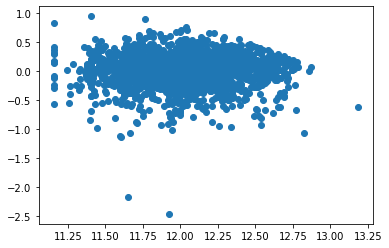

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(res.fittedvalues, res.resid);

__Make Predictions__

Since we modeled the log(SalePrice) instead of SalePrice, you need to bring the fitt back to the original scale by taking `exp`.

In [ ]:
# Concat fitted and actual
pd.concat({'fitted':np.exp(res.fittedvalues).round(), 
           'actual':df.SalePrice}, 
          axis=1)

,fitted,actual
0,177125.0,215000
1,127647.0,105000
2,152680.0,172000
3,267600.0,244000
4,166661.0,189900
...,...,...
2853,171745.0,142500
2854,162443.0,131000
2855,100788.0,132000
2856,200467.0,170000


__With BoxCox Transformation__

The Box Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a [1964 paper](https://www.jstor.org/stable/2984418) and developed the technique.

It is used to transform a non-normal variable to take close to a normal shape.

```
y = (x**lambda - 1) / lambda,  for lambda != 0
    log(x),                    for lambda = 0
```

In [ ]:
from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(df['SalePrice'])
df['SalePrice_boxcox'] = fitted_data
print("Lambda", fitted_lambda)

Lambda 0.1537575863405569


In [ ]:
# Fit model
mod = smf.ols(formula='SalePrice_boxcox ~ TotalBsmtSF + GarageCars', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       SalePrice_boxcox   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     2020.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:31:57   Log-Likelihood:                -5340.1
No. Observations:                2858   AIC:                         1.069e+04
Df Residuals:                    2855   BIC:                         1.070e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.3606      0.090    325.560      

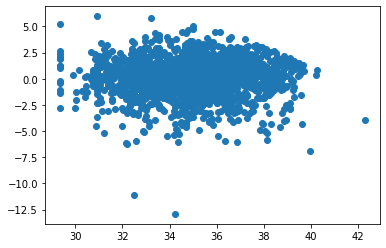

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(res.fittedvalues, res.resid);

__Make predictions by doing [inverse boxcox transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.inv_boxcox.html)__

```
y_inv = (y + 1)**(1/lambda)   for lambda != 0
y_inv = exp(y)                for lambda = 0
```

In [ ]:
# Inverse boxcox transformation
from scipy.special import inv_boxcox
y_boxcox = res.fittedvalues
y = inv_boxcox(y_boxcox, fitted_lambda)

In [ ]:
# concat
pd.concat({'fitted':y.round()[:10], 
           'actual':df.SalePrice[:10]}, 
          axis=1)

,fitted,actual
0,179083.0,215000
1,128465.0,105000
2,154461.0,172000
3,266334.0,244000
4,168539.0,189900
5,168404.0,195500
6,198257.0,213500
7,193802.0,191500
8,219056.0,236500
9,173051.0,189000


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Model Building Approach 1 : Forward Selection (Manual)</h2>
</div>

It is a modelling/feature selection approach where we start with a model that doesn't contain any feature and then we start adding the most significant features one after the other. It is also known as forward selection.

p-value and r2 value are the criterion for checking if the added variable added any value to the model or not

In this section you will:
- Build model with 1 variable
- Build model with 2 variables
- Build model with 3 variables

### Build model with 1 variable

In [80]:
X_train.head()

,Order,PID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,zscore_SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleTyp

In [81]:
# Select only one feature in regression model
X_train1 = X_train['OverallQual']

In [82]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train, X_train1).fit()

In [83]:
# Check parameters created
model_1.params

const         -132980.897365
OverallQual     51522.181335
dtype: float64

In [85]:
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1531.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          3.15e-187
Time:                        14:12:55   Log-Likelihood:                -9667.4
No. Observations:                 794   AIC:                         1.934e+04
Df Residuals:                     792   BIC:                         1.935e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.33e+05   9013.720    -14.753      

There is a lot of scope to improve the R-squared. Let's add more predictors.

### Build model with 2 variables

- Add 1 more variable to the model

In [86]:
# Add one more feature in regression model
X_train2 = X_train[['OverallQual','GrLivArea']]

In [87]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create second ols model
model_2 = sm.OLS(y_train, X_train2).fit()

In [88]:
# Check parameters created
model_2.params

const         -154883.814844
OverallQual     38791.177023
GrLivArea          65.487368
dtype: float64

In [89]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1299.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          1.22e-250
Time:                        14:13:20   Log-Likelihood:                -9516.9
No. Observations:                 794   AIC:                         1.904e+04
Df Residuals:                     791   BIC:                         1.905e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.549e+05   7550.006    -20.514      

R-squared and Adj. R squared has increased for the model, but we can still improvise over it so let's add more features

__Optionally check VIF as well__

Since only 2 variables are involved, not typically high.

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.90
1,OverallQual,1.37
2,GrLivArea,1.37


### Build model with 3 variables

- Add 1 more variable to the model

In [91]:
# Adding one more feature in regression model
X_train3 = X_train[['OverallQual', 'GrLivArea', 'GarageCars']]

In [92]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create third fitted model
model_3 = sm.OLS(y_train, X_train3).fit()

In [93]:
# Check parameters created
model_3.params

const         -149975.757539
OverallQual     34004.874121
GrLivArea          56.197997
GarageCars      20373.224245
dtype: float64

In [94]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     951.5
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          1.02e-261
Time:                        14:14:02   Log-Likelihood:                -9487.5
No. Observations:                 794   AIC:                         1.898e+04
Df Residuals:                     790   BIC:                         1.900e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -1.5e+05   7307.662    -20.523      

__VIF__

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.12
3,GarageCars,1.78
1,OverallQual,1.72
2,GrLivArea,1.55


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- We have achieved an Adj R-squared of `0.78` by manually picking the highly correlated variables.

You can keep on adding variables one by one till the model stops improving. 


Now lets look at another approach of building a regression model. 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building Approach 2 : Manual Backward Selection</h2>
</div>

Backward stepwise selection is a variable selection method. 

Steps associated in backward stepwise selection are :
- Create a model with all variables under consideration (you can choose top 10, 15, 20 etc as well) In this case we will consider 19 variables
- Remove the least significant variables one after the other
- Keep on removing the variables until all the variables in model are significant and follows the assumptions of linear regression

Note: You can set the rule of stopping as per your requirement



In this section you will:
- Choose 19 best variable using correlation
- Eliminate variables one by one using p-value and VIF


In [121]:
highest_correlated_cols

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemod/Add', 'GarageYrBlt',
       'MasVnrArea', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'BsmtFullBath', '2ndFlrSF'],
      dtype='object')

In [123]:
# Creating X_train dataframe with highest correlation variables
X_train_corr = X_train[highest_correlated_cols.drop('LotFrontage')]
X_train_corr.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemod/Add,GarageYrBlt,MasVnrArea,TotRmsAbvGrd,Fireplaces,BsmtFinSF1,WoodDeckSF,OpenPorchSF,HalfBath,BsmtFullBath,2ndFlrSF
395,6,1523,2.0,478.0,1193.0,1523,1976,2,1976,1976.0,160.0,7,1,644.0,0,0,0,0.0,0
328,7,1660,2.0,493.0,831.0,831,2002,2,2002,2002.0,95.0,7,0,0.0,144,68,1,0.0,829
544,6,1094,2.0,495.0,1094.0,1094,1953,1,1953,1953.0,216.0,5,2,500.0,0,0,0,0.0,0
609,6,1495,2.0,438.0,1495.0,1495,1989,2,1989,1989.0,128.0,8,1,0.0,252,0,0,0.0,0
750,6,1573,2.0,440.0,756.0,769,2000,2,2000,2000.0,216.0,4,0,417.0,0,32,1,0.0,804


After passing the arbitary selected columns we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF  : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### Check VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [124]:
random.seed(0)

# Add a constant
X_train_corrc = sm.add_constant(X_train_corr)

# Build the model with RFE features
lm_corr = sm.OLS(y_train,X_train_corrc).fit()

#Summary of linear model
print(lm_corr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     277.8
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          4.45e-323
Time:                        14:39:25   Log-Likelihood:                -9297.1
No. Observations:                 794   AIC:                         1.863e+04
Df Residuals:                     775   BIC:                         1.872e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.38e+06   1.89e+05     -7.306

Since the p value for few of the features is not siginificant, we need to drop it but before that let's check the VIF score as well

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr.values, i) for i in range(X_train_corr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/Users/ankitwahane/ankitw497 github/DataScience Basics/DataScience-Basics/.venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
18,2ndFlrSF,inf
5,1stFlrSF,inf
1,GrLivArea,inf
9,GarageYrBlt,126406.21
6,YearBuilt,113404.19
8,YearRemod/Add,46391.07
0,OverallQual,67.22
11,TotRmsAbvGrd,65.72
2,GarageCars,51.28
3,GarageArea,42.79


Since the variable **GrLivArea** is having a very high p value and VIF , we would remove the feature from training dataset

In [128]:
# Dropping insignificant variables

X_train_corr1 = X_train_corr.drop(columns= ['GrLivArea'])

# Adding a constant variable and Build a second fitted model

X_train_corr1c = sm.add_constant(X_train_corr1)
lm_corr1 = sm.OLS(y_train, X_train_corr1c).fit()

#Summary of linear model
print(lm_corr1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     277.8
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          4.45e-323
Time:                        14:40:55   Log-Likelihood:                -9297.1
No. Observations:                 794   AIC:                         1.863e+04
Df Residuals:                     775   BIC:                         1.872e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.38e+06   1.89e+05     -7.306

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr1.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr1.values, i) for i in range(X_train_corr1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GarageYrBlt,126406.21
5,YearBuilt,113404.19
7,YearRemod/Add,46391.07
4,1stFlrSF,83.95
0,OverallQual,67.22
10,TotRmsAbvGrd,65.72
1,GarageCars,51.28
2,GarageArea,42.79
3,TotalBsmtSF,41.37
6,FullBath,28.98


Since the variable **TotRmsAbvGrd** is having a very high p value, and sign is not right. Let's remove this feature from training dataset

In [ ]:
# Dropping insignificant variables

X_train_corr2 = X_train_corr1.drop('TotRmsAbvGrd', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr2c = sm.add_constant(X_train_corr2)
lm_corr2 = sm.OLS(y_train, X_train_corr2c).fit()

#Summary of linear model
print(lm_corr2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     770.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:12:13   Log-Likelihood:                -23105.
No. Observations:                2000   AIC:                         4.625e+04
Df Residuals:                    1982   BIC:                         4.635e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.35e+06   7.97e+04    -16.932

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/1135619536.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr2 = X_train_corr1.drop('TotRmsAbvGrd', 1,)


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr2.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr2.values, i) for i in range(X_train_corr2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GarageYrBlt,19799.57
5,YearBuilt,16082.98
7,YearRemod/Add,12186.12
0,OverallQual,46.26
4,1stFlrSF,39.09
1,GarageCars,36.89
2,GarageArea,33.06
3,TotalBsmtSF,23.98
6,FullBath,20.40
16,2ndFlrSF,5.02


Since the variable **FullBath** is having incorrect sign, we would remove the feature from training dataset

In [ ]:
# Dropping insignificant variables

X_train_corr3 = X_train_corr2.drop('FullBath', 1,)
# X_train_corr 3 = X_train_corr2.drop('TotRmsAbvGrd', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr3c = sm.add_constant(X_train_corr3)
lm_corr3 = sm.OLS(y_train, X_train_corr3c).fit()

#Summary of linear model
print(lm_corr3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     811.8
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:13:01   Log-Likelihood:                -23113.
No. Observations:                2000   AIC:                         4.626e+04
Df Residuals:                    1983   BIC:                         4.635e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.228e+06   7.37e+04    -16.657

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/1109800845.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr3 = X_train_corr2.drop('FullBath', 1,)


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr3.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr3.values, i) for i in range(X_train_corr3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,GarageYrBlt,19797.40
5,YearBuilt,15633.16
6,YearRemod/Add,11820.11
0,OverallQual,44.98
1,GarageCars,35.55
4,1stFlrSF,35.34
2,GarageArea,32.63
3,TotalBsmtSF,23.98
10,BsmtFinSF1,4.24
15,2ndFlrSF,3.60


Since the variable **HalfBath** is having a wrong sign, we remove the feature from training dataset.

In [ ]:
# Dropping insignificant variables

X_train_corr4 = X_train_corr3.drop('HalfBath', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr4c = sm.add_constant(X_train_corr4)
lm_corr4 = sm.OLS(y_train, X_train_corr4c).fit()

#Summary of linear model
print(lm_corr4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     866.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:13:39   Log-Likelihood:                -23113.
No. Observations:                2000   AIC:                         4.626e+04
Df Residuals:                    1984   BIC:                         4.635e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.221e+06    7.3e+04    -16.726

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/4078322716.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr4 = X_train_corr3.drop('HalfBath', 1,)


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr4.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr4.values, i) for i in range(X_train_corr4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,GarageYrBlt,19718.74
5,YearBuilt,14942.87
6,YearRemod/Add,11538.16
0,OverallQual,44.98
1,GarageCars,35.45
4,1stFlrSF,35.09
2,GarageArea,32.58
3,TotalBsmtSF,23.98
10,BsmtFinSF1,4.24
13,BsmtFullBath,2.93


**GarageCars, GarageYrBlt, BsmtFullBath** are not significant. **GarageYrBlt** has highest VIF and seems less important by meaning. LEt's remove it. This is a subjective decision.

In [ ]:
# Dropping insignificant variables

X_train_corr5 = X_train_corr4.drop('GarageYrBlt', 1,)
# X_train_corr5 = X_train_corr4.drop('HalfBath', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr5c = sm.add_constant(X_train_corr5)
lm_corr5 = sm.OLS(y_train, X_train_corr5c).fit()

#Summary of linear model
print(lm_corr5.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr5.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr5.values, i) for i in range(X_train_corr5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     927.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:16:31   Log-Likelihood:                -23113.
No. Observations:                2000   AIC:                         4.626e+04
Df Residuals:                    1985   BIC:                         4.634e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.202e+06   7.04e+04    -17.061

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/608145549.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr5 = X_train_corr4.drop('GarageYrBlt', 1,)


,Features,VIF
5,YearBuilt,8220.27
6,YearRemod/Add,8063.95
0,OverallQual,44.44
4,1stFlrSF,35.08
1,GarageCars,34.87
2,GarageArea,31.73
3,TotalBsmtSF,23.97
9,BsmtFinSF1,4.23
12,BsmtFullBath,2.93
13,2ndFlrSF,2.63


**YearBuilt and YearReMod** have high VIF. Remove **YearBuilt**, subjective.

In [ ]:
# Dropping insignificant variables

X_train_corr6 = X_train_corr5.drop('YearBuilt', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr6c = sm.add_constant(X_train_corr6)
lm_corr6 = sm.OLS(y_train, X_train_corr6c).fit()

#Summary of linear model
print(lm_corr6.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr6.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr6.values, i) for i in range(X_train_corr6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     971.8
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:17:47   Log-Likelihood:                -23138.
No. Observations:                2000   AIC:                         4.630e+04
Df Residuals:                    1986   BIC:                         4.638e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.021e+06   6.64e+04    -15.384

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/2473452331.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr6 = X_train_corr5.drop('YearBuilt', 1,)


,Features,VIF
0,OverallQual,43.73
4,1stFlrSF,34.70
1,GarageCars,34.30
2,GarageArea,31.72
5,YearRemod/Add,29.50
3,TotalBsmtSF,23.93
8,BsmtFinSF1,4.20
11,BsmtFullBath,2.93
7,Fireplaces,2.53
12,2ndFlrSF,2.52


At this point the signs all make sense and the variables are all significant except **"BsmtFullBath"**.

VIF however is a problem.

In [ ]:
# Dropping insignificant variables

X_train_corr7 = X_train_corr6.drop('BsmtFullBath', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr7c = sm.add_constant(X_train_corr7)
lm_corr7 = sm.OLS(y_train, X_train_corr7c).fit()

#Summary of linear model
print(lm_corr7.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr7.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr7.values, i) for i in range(X_train_corr7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1052.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:20:44   Log-Likelihood:                -23139.
No. Observations:                2000   AIC:                         4.630e+04
Df Residuals:                    1987   BIC:                         4.638e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.025e+06   6.64e+04    -15.442

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/611049075.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr7 = X_train_corr6.drop('BsmtFullBath', 1,)


,Features,VIF
0,OverallQual,43.71
4,1stFlrSF,34.51
1,GarageCars,34.27
2,GarageArea,31.71
5,YearRemod/Add,29.40
3,TotalBsmtSF,23.89
8,BsmtFinSF1,2.78
7,Fireplaces,2.53
11,2ndFlrSF,2.51
10,OpenPorchSF,1.77


Remove **GarageCars** for high p-value and VIF.

In [ ]:
# Dropping insignificant variables

X_train_corr8 = X_train_corr7.drop('GarageCars', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr8c = sm.add_constant(X_train_corr8)
lm_corr8 = sm.OLS(y_train, X_train_corr8c).fit()

#Summary of linear model
print(lm_corr8.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr8.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr8.values, i) for i in range(X_train_corr8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1146.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:22:05   Log-Likelihood:                -23141.
No. Observations:                2000   AIC:                         4.631e+04
Df Residuals:                    1988   BIC:                         4.637e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.042e+06   6.57e+04    -15.848

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/2177587101.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr8 = X_train_corr7.drop('GarageCars', 1,)


,Features,VIF
0,OverallQual,41.97
3,1stFlrSF,34.51
4,YearRemod/Add,29.36
2,TotalBsmtSF,23.89
1,GarageArea,9.93
7,BsmtFinSF1,2.78
6,Fireplaces,2.52
10,2ndFlrSF,2.50
9,OpenPorchSF,1.76
5,MasVnrArea,1.73


**Which one to remove amongst the high VIFs?**

Remove **'1stFlrSF'**, since 'TotalBsmtSF' also conveys similar info.

In [ ]:
# Dropping insignificant variables

X_train_corr9 = X_train_corr8.drop('1stFlrSF', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr9c = sm.add_constant(X_train_corr9)
lm_corr9 = sm.OLS(y_train, X_train_corr9c).fit()

#Summary of linear model
print(lm_corr9.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr9.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr9.values, i) for i in range(X_train_corr9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1058.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:24:00   Log-Likelihood:                -23291.
No. Observations:                2000   AIC:                         4.660e+04
Df Residuals:                    1989   BIC:                         4.667e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.808e+05   7.07e+04    -13.863

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/3419056146.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr9 = X_train_corr8.drop('1stFlrSF', 1,)


,Features,VIF
0,OverallQual,41.91
3,YearRemod/Add,24.45
2,TotalBsmtSF,16.28
1,GarageArea,9.59
6,BsmtFinSF1,2.77
5,Fireplaces,2.37
9,2ndFlrSF,2.29
8,OpenPorchSF,1.75
7,WoodDeckSF,1.73
4,MasVnrArea,1.72


We have two points drop in R-sq. What happens, if we had removed **TotalBsmtSF** instead?

Let's check.

In [ ]:
# Dropping insignificant variables

X_train_corr9 = X_train_corr8.drop('TotalBsmtSF', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr9c = sm.add_constant(X_train_corr9)
lm_corr9 = sm.OLS(y_train, X_train_corr9c).fit()

#Summary of linear model
print(lm_corr9.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr9.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr9.values, i) for i in range(X_train_corr9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1213.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:25:35   Log-Likelihood:                -23174.
No. Observations:                2000   AIC:                         4.637e+04
Df Residuals:                    1989   BIC:                         4.643e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.048e+06   6.68e+04    -15.683

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/138913035.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr9 = X_train_corr8.drop('TotalBsmtSF', 1,)


,Features,VIF
0,OverallQual,38.80
3,YearRemod/Add,28.94
2,1stFlrSF,23.52
1,GarageArea,9.91
6,BsmtFinSF1,2.61
5,Fireplaces,2.52
9,2ndFlrSF,2.43
8,OpenPorchSF,1.75
4,MasVnrArea,1.73
7,WoodDeckSF,1.73


**Much Better**. We didn't lose much on R-sq!

Now, its between the first 3 variables.

Let's try: **OverallQual**

In [ ]:
# Dropping insignificant variables

X_train_corr10 = X_train_corr9.drop('OverallQual', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr10c = sm.add_constant(X_train_corr10)
lm_corr10 = sm.OLS(y_train, X_train_corr10c).fit()

#Summary of linear model
print(lm_corr10.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr10.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr10.values, i) for i in range(X_train_corr10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     898.4
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:27:57   Log-Likelihood:                -23512.
No. Observations:                2000   AIC:                         4.704e+04
Df Residuals:                    1990   BIC:                         4.710e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.813e+06   7.23e+04    -25.065

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/3145396044.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr10 = X_train_corr9.drop('OverallQual', 1,)


,Features,VIF
1,1stFlrSF,22.13
2,YearRemod/Add,17.01
0,GarageArea,9.02
5,BsmtFinSF1,2.61
4,Fireplaces,2.49
8,2ndFlrSF,2.31
6,WoodDeckSF,1.73
7,OpenPorchSF,1.72
3,MasVnrArea,1.68


5 Points drop in R-sq! Let's retain **OverallQual** and remove **YearRemod/Add** instead.

In [ ]:
# Dropping insignificant variables

X_train_corr10 = X_train_corr9.drop('YearRemod/Add', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr10c = sm.add_constant(X_train_corr10)
lm_corr10 = sm.OLS(y_train, X_train_corr10c).fit()

#Summary of linear model
print(lm_corr10.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr10.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr10.values, i) for i in range(X_train_corr10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1200.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:29:11   Log-Likelihood:                -23274.
No. Observations:                2000   AIC:                         4.657e+04
Df Residuals:                    1990   BIC:                         4.662e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -8.34e+04   3222.464    -25.880      

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/3834024306.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr10 = X_train_corr9.drop('YearRemod/Add', 1,)


,Features,VIF
0,OverallQual,22.81
2,1stFlrSF,19.44
1,GarageArea,9.85
5,BsmtFinSF1,2.61
4,Fireplaces,2.39
8,2ndFlrSF,2.32
6,WoodDeckSF,1.72
7,OpenPorchSF,1.70
3,MasVnrArea,1.58


**Much Better again!**

Now, we have to make a choice between "OverallQual", "1stFlrSF", and "GarageArea". We know the importance of the first two on R-sq now. 

Let's try removing **"GarageArea"**.

In [ ]:
# Dropping insignificant variables

X_train_corr11 = X_train_corr10.drop('GarageArea', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr11c = sm.add_constant(X_train_corr11)
lm_corr11 = sm.OLS(y_train, X_train_corr11c).fit()

#Summary of linear model
print(lm_corr11.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr11.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr11.values, i) for i in range(X_train_corr11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1242.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:31:56   Log-Likelihood:                -23344.
No. Observations:                2000   AIC:                         4.671e+04
Df Residuals:                    1991   BIC:                         4.676e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -8.67e+04   3324.748    -26.076      

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/3336031349.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr11 = X_train_corr10.drop('GarageArea', 1,)


,Features,VIF
0,OverallQual,20.41
1,1stFlrSF,18.36
4,BsmtFinSF1,2.59
3,Fireplaces,2.38
7,2ndFlrSF,2.29
5,WoodDeckSF,1.71
6,OpenPorchSF,1.69
2,MasVnrArea,1.55


Minimal damage on R-sq. Now, we except the worst hit on R-sq and remove **1stFlrSF**.


In [ ]:
# Dropping insignificant variables

X_train_corr12 = X_train_corr11.drop('1stFlrSF', 1,)

# Adding a constant variable and Build a second fitted model

X_train_corr12c = sm.add_constant(X_train_corr12)
lm_corr12 = sm.OLS(y_train, X_train_corr12c).fit()

#Summary of linear model
print(lm_corr12.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr12.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr12.values, i) for i in range(X_train_corr12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     936.7
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:34:42   Log-Likelihood:                -23678.
No. Observations:                2000   AIC:                         4.737e+04
Df Residuals:                    1992   BIC:                         4.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.832e+04   3579.465    -13.500      

C:\Users\NDH00130\AppData\Local\Temp/ipykernel_18308/562913031.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_corr12 = X_train_corr11.drop('1stFlrSF', 1,)


,Features,VIF
0,OverallQual,4.60
3,BsmtFinSF1,2.54
2,Fireplaces,2.30
6,2ndFlrSF,1.88
4,WoodDeckSF,1.70
5,OpenPorchSF,1.68
1,MasVnrArea,1.55


Let's stop here.

Check mean of error.

In [ ]:
# Mean residuals
lm_corr12.resid.mean()

4.507135599851608e-09

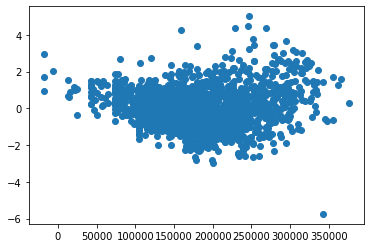

In [ ]:
# Standardized residuals
fig, ax = plt.subplots(figsize=(6,4))
resid_standardized = (lm_corr12.resid-lm_corr12.resid.mean())/lm_corr12.resid.std()
ax.scatter(lm_corr12.fittedvalues, resid_standardized);

__Take log of Y__ to rectify Heteroscedasticity.

In [ ]:
# Adding a constant variable and Build a second fitted model
X_train_corr12c = sm.add_constant(X_train_corr12)
lm_corr_fin = sm.OLS(np.log(y_train), X_train_corr12c).fit()

#Summary of linear model
print(lm_corr_fin.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_corr12.columns
vif['VIF'] = [variance_inflation_factor(X_train_corr12.values, i) for i in range(X_train_corr12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     957.2
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:38:36   Log-Likelihood:                 520.24
No. Observations:                2000   AIC:                            -1024.
Df Residuals:                    1992   BIC:                            -979.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6975      0.020    536.960      

,Features,VIF
0,OverallQual,4.60
3,BsmtFinSF1,2.54
2,Fireplaces,2.30
6,2ndFlrSF,1.88
4,WoodDeckSF,1.70
5,OpenPorchSF,1.68
1,MasVnrArea,1.55


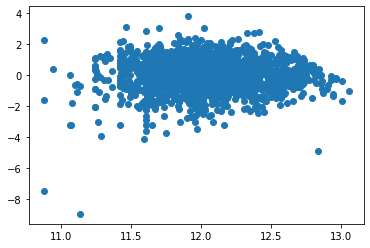

In [ ]:
# Standardized residuals
fig, ax = plt.subplots(figsize=(6,4))
resid_standardized = (lm_corr_fin.resid-lm_corr_fin.resid.mean())/lm_corr_fin.resid.std()
ax.scatter(lm_corr_fin.fittedvalues, resid_standardized);

**Check Cook's distance and remove influential obs, then re-fit.**

In [ ]:
# Cooks distance
influence = lm_corr_fin.get_influence()
cooks = influence.cooks_distance
print(cooks)

(array([0.00163751, 0.00000087, 0.00038345, ..., 0.00011905, 0.00006533,
       0.00018   ]), array([1., 1., 1., ..., 1., 1., 1.]))


In [ ]:
print(cooks[0].shape, X_train_corr12.index.shape)

(2000,) (2000,)


Mean of Cooks D: 0.0005894482274911578


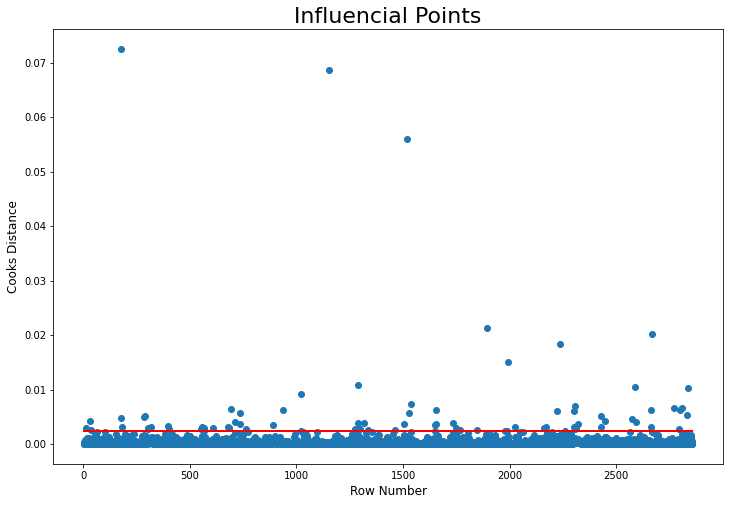

In [ ]:
mean_cooks = np.nanmean(cooks[0])
print("Mean of Cooks D:", mean_cooks)
mean_cooks_list = [4*mean_cooks for i in np.arange(X_train_corr12.index.shape[0])]


# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(X_train_corr12.index, cooks[0])
plt.plot(X_train_corr12.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
X_train_corr12.head()

,OverallQual,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,OpenPorchSF,2ndFlrSF
1930,3,0.0,0,331.0,0,176,504
497,8,206.0,1,379.0,297,50,0
1246,6,0.0,0,0.0,0,0,0
952,6,320.0,0,866.0,0,247,0
1464,4,0.0,0,1024.0,252,64,0


In [ ]:
# Remove Influencial points: Likely to be outiers, harder to predict accurately.
influencial_points = X_train_corr12.index[cooks[0] > 8*mean_cooks]
influencial_points.values

array([2666,  177, 1893, 1656, 2221, 2838, 2303, 2808, 2428,  179, 2589,
        938, 2236,  286, 2797,  290,  736, 1519, 2307, 1291, 1991, 1535,
       2771,  692, 1022, 2664, 1529, 1154, 2831], dtype=int64)

In [ ]:
infuential_mask = X_train_corr12.index.isin(influencial_points.values)
print("Removing these many top influential observations: ", infuential_mask.sum())

# Create a first ols model
X_train_corr12c = sm.add_constant(X_train_corr12)
model = sm.OLS(np.log(y_train[~infuential_mask]), X_train_corr12c.loc[~infuential_mask, :]).fit()
print(model.summary())

Removing these many top influential observations:  29
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1069.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:55:40   Log-Likelihood:                 691.11
No. Observations:                1971   AIC:                            -1366.
Df Residuals:                    1963   BIC:                            -1322.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

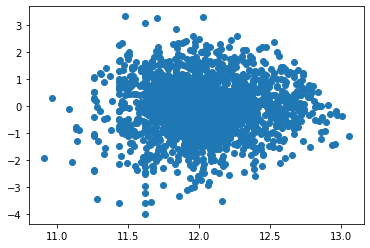

In [ ]:
# Standardized residuals
fig, ax = plt.subplots(figsize=(6,4))
resid_standardized = (model.resid-model.resid.mean())/model.resid.std()
ax.scatter(model.fittedvalues, resid_standardized);

Okay!. Let's Stop here :)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>8. Recursive Feature Elimination</h2>
</div>

It is an automated way of selecting important features for a machine learning model, by iteratively removing features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(X_train.shape)
print(y_train.shape)
X_train.head()

(2000, 318)
(2000, 1)


,Order,PID,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,zscore_SalePrice,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Ex,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_S

In [ ]:
# Drop redundant
init_columns = highest_correlated_cols.drop("LotFrontage")
X_train_sci = X_train.drop(["Order", "PID"], axis=1).loc[:, init_columns]
X_train_sci.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemod/Add,GarageYrBlt,MasVnrArea,TotRmsAbvGrd,Fireplaces,BsmtFinSF1,WoodDeckSF,OpenPorchSF,HalfBath,BsmtFullBath,2ndFlrSF
1930,3,1183,1.0,308.0,649.0,679,1948,1,2002,1981.0,0.0,6,0,331.0,0,176,1,0.0,504
497,8,1432,2.0,492.0,1422.0,1432,2006,2,2006,2006.0,206.0,7,1,379.0,297,50,0,0.0,0
1246,6,832,2.0,528.0,832.0,832,1954,1,1954,1962.0,0.0,4,0,0.0,0,0,0,0.0,0
952,6,1204,2.0,412.0,1204.0,1204,1998,2,1998,1998.0,320.0,5,0,866.0,0,247,0,1.0,0
1464,4,1132,2.0,451.0,1132.0,1132,2005,1,2005,2005.0,0.0,5,0,1024.0,252,64,1,1.0,0


In [ ]:
# Scale tRaining data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_sci)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
dict(zip(init_columns.values, lr.coef_[0].round(3)))

{'OverallQual': 138026.012,
 'GrLivArea': -20202.591,
 'GarageCars': 10703.063,
 'GarageArea': 37586.852,
 'TotalBsmtSF': 62722.287,
 '1stFlrSF': 171146.513,
 'YearBuilt': 28345.59,
 'FullBath': -25901.71,
 'YearRemod/Add': 23134.574,
 'GarageYrBlt': 6943.979,
 'MasVnrArea': 22517.783,
 'TotRmsAbvGrd': -14353.71,
 'Fireplaces': 26456.399,
 'BsmtFinSF1': 36256.591,
 'WoodDeckSF': 19021.559,
 'OpenPorchSF': 15728.146,
 'HalfBath': -7344.173,
 'BsmtFullBath': 4681.359,
 '2ndFlrSF': 111675.622}

__Note:__ Signs of some of the important variables are negative, so they can be eliminated in round 1.

In [ ]:
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train_sci, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
# RFE Output
out = list(zip(X_train_sci.columns, rfe.support_, rfe.ranking_))
out.sort(key=lambda x: x[2])  # sort
out

[('OverallQual', True, 1),
 ('GarageCars', True, 1),
 ('YearBuilt', True, 1),
 ('FullBath', True, 1),
 ('YearRemod/Add', True, 1),
 ('GarageYrBlt', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('HalfBath', True, 1),
 ('BsmtFullBath', True, 1),
 ('1stFlrSF', False, 2),
 ('2ndFlrSF', False, 3),
 ('GarageArea', False, 4),
 ('TotalBsmtSF', False, 5),
 ('OpenPorchSF', False, 6),
 ('MasVnrArea', False, 7),
 ('BsmtFinSF1', False, 8),
 ('WoodDeckSF', False, 9),
 ('GrLivArea', False, 10),
 ('const', False, 11)]

In [ ]:
# Selected features
rfe_selected_cols = [i[0] for i in out if i[1]]
rfe_selected_cols

['OverallQual',
 'GarageCars',
 'YearBuilt',
 'FullBath',
 'YearRemod/Add',
 'GarageYrBlt',
 'TotRmsAbvGrd',
 'Fireplaces',
 'HalfBath',
 'BsmtFullBath']

__Rebuild OLS__

In [ ]:
# Create a first ols model
X_train_sci = sm.add_constant(X_train_sci)
model_rfe = sm.OLS(y_train, X_train_sci.loc[:, ["const"]+(rfe_selected_cols)]).fit()
print(model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     752.5
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:22:20   Log-Likelihood:                -23569.
No. Observations:                2000   AIC:                         4.716e+04
Df Residuals:                    1989   BIC:                         4.722e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.191e+06   9.72e+04    -12.253

__Rebuild with 8 vars__

In [ ]:
# 8 vars
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_train_sci, y_train)

# RFE Output
out = list(zip(X_train_sci.columns, rfe.support_, rfe.ranking_))
out.sort(key=lambda x: x[2])  # sort

# Selected features
rfe_selected_cols = [i[0] for i in out if i[1]]
rfe_selected_cols

# Create a first ols model
model_rfe = sm.OLS(y_train, X_train_sci.loc[:, ["const"]+(rfe_selected_cols)]).fit()
print(model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     921.3
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:28:06   Log-Likelihood:                -23586.
No. Observations:                2000   AIC:                         4.719e+04
Df Residuals:                    1991   BIC:                         4.724e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.195e+05    8.5e+04    -10.815

In [ ]:
rfe_selected_cols.remove("HalfBath")

In [ ]:
# Create a first ols model
model_rfe = sm.OLS(y_train, X_train_sci.loc[:, ["const"]+(rfe_selected_cols)]).fit()
print(model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1053.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:28:24   Log-Likelihood:                -23587.
No. Observations:                2000   AIC:                         4.719e+04
Df Residuals:                    1992   BIC:                         4.723e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.289e+05   8.42e+04    -11.033

All the variables are significant. But don't stop here, because, other problems can still be there.

Let's check VIF.

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = rfe_selected_cols
vif['VIF'] = [variance_inflation_factor(X_train_sci.loc[:, rfe_selected_cols].values, i) for i in range(len(rfe_selected_cols))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,38.14
3,YearRemod/Add,32.99
4,TotRmsAbvGrd,26.95
2,FullBath,16.19
1,GarageCars,10.67
5,Fireplaces,2.26
6,BsmtFullBath,1.82


As suspected, there is multi collinearity => which means the coefficient estimates can change wildly as the data sample changes, thereby weakening the model.

__Ref:__ https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>8. Model Building Approach 3 : Stepwise Selection</h2>
</div>

It is an automated way of selecting and removing the features based on a given criteria. 

Here the criteria is p-value

In this section you will:
- Add new features if the p-value is less than threshold_in
- Remove the feature if the p-value is more than threshold_out

In [ ]:
## By David Dale https://datascience.stackexchange.com/users/24162/david-dale

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
X_train.drop("zscore_SalePrice", axis=1).head()

In [ ]:
result = stepwise_selection(X_train.drop("zscore_SalePrice", axis=1), y_train)

print('resulting features:')
print(result)

In [ ]:
# result = ['OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'GarageArea', 'RoofMatl_ClyTile', 'BsmtFinSF1', 'MiscFeature_Elev', 'Condition2_PosN', 'MSSubClass', 'YearBuilt', 'KitchenQual_Ex', 'BedroomAbvGr', 'OverallCond', 'LotArea', 'Neighborhood_NoRidge', 'ExterQual_Ex', 'Neighborhood_StoneBr', 'PoolQC_Ex', 'SaleType_New', 'BsmtExposure_Gd', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'BldgType_Duplex', 'Neighborhood_GrnHill', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'SaleCondition_Abnorml', 'BsmtExposure_Av', 'RoofMatl_WdShngl', 'Condition1_Norm', 'Foundation_PConc', 'ScreenPorch', 'LowQualFinSF', 'MasVnrArea', 'MasVnrType_None', 'Exterior1st_BrkFace', 'Functional_Typ', 'PoolArea', 'GarageType_None', 'GarageType_BuiltIn', 'LandSlope_Sev', 'MasVnrType_CBlock', 'BsmtFinType2_GLQ', 'BsmtFinType1_GLQ', 'Functional_Sev', 'MasVnrType_Stone', 'Neighborhood_BrkSide', 'MSZoning_RM', 'HouseStyle_2Story', 'Neighborhood_Sawyer', 'FullBath', 'GarageFinish_RFn', 'Exterior2nd_Plywood', 'WoodDeckSF', 'BsmtCond_None', 'BsmtQual_None', 'BsmtFinType1_None']

In [ ]:
X_train_stepwise = X_train[result]

# Adding a constant variable and Build a second fitted model

X_train_stepwise = sm.add_constant(X_train_stepwise)
lm_stepwise      = sm.OLS(y_train, X_train_stepwise).fit()

#Summary of linear model
print(lm_stepwise.summary())

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>9. Model Prediction and Evaluation</h2>
</div>

In [ ]:
# Predicting the price of training set.
X_test_stepwise = X_test[result]
X_test_stepwise = sm.add_constant(X_test_stepwise)
actual          = y_test["SalePrice"]
prediction      = lm_stepwise.predict(X_test_stepwise)

## Evaluation Metrics

In [ ]:
# MSE - Mean Squared Error
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

In [ ]:
# MAPE - Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(actual, prediction)

## Check Assumptions

In [ ]:
# Check for Linearity
sns.scatterplot(y_test['SalePrice'],prediction)
plt.title('Actual vs Predicted')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

In [ ]:
# Check for homoscedasticity
sns.scatterplot(prediction, y_test['SalePrice'] - prediction)
plt.title('Error vs Prediction')
plt.xlabel('Predicted value')
plt.ylabel('Error')

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test['SalePrice'] - prediction), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

## Linear Regression using sklearn

In [ ]:
# Linear regression 
model = LinearRegression().fit(X_train_stepwise, y_train)
model

In [ ]:
# R square
model.score(X_train_stepwise, y_train)

In [ ]:
# Intercept
model.intercept_

In [ ]:
# Coeffecients
model.coef_

In [ ]:
# Predictions
model.predict(X_test_stepwise)[:10]

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cross validation score
scores = cross_val_score(model,X_train_stepwise,y_train, scoring = 'neg_mean_absolute_percentage_error', cv=5)
scores

In [ ]:
# Average of the MAPE scores
abs(scores.mean())

## Influencial Points

In [ ]:
# Build Model
Xc = X[result]
Xc = sm.add_constant(Xc)
lm = sm.OLS(y, Xc).fit()

#Summary of linear model
print(lm.summary())

In [ ]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = lm.get_influence()

In [ ]:
#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

The rows which have cook's distance greater than 4x of mean cook's distance are known as influencial points 

In [ ]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(X.index, cooks[0])
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
cooks[0]

In [ ]:
mean_cooks = np.nanmean(cooks[0])
mean_cooks

In [ ]:
mean_cooks_list = [4*mean_cooks for i in X.index]
# mean_cooks_list

In [ ]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(X.index, cooks[0])
plt.plot(X.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(X.index, cooks[0])
plt.plot(X.index, mean_cooks_list, color="red")
plt.ylim(0,10)
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [ ]:
# Influencial points
influencial_points = X.index[cooks[0] > 4*mean_cooks]
influencial_points

In [ ]:
df.iloc[influencial_points, :]

## Transformation

In [ ]:
# Log transformation
y_log_transformed = np.log(y)

In [ ]:
# Build Model
Xc = X[result]
Xc = sm.add_constant(Xc)
lm      = sm.OLS(y_log_transformed, Xc).fit()

#Summary of linear model
print(lm.summary())